In [2]:
import shogi_node as sn
import shogi_learn as sl
from sql_setting import *

In [3]:
sn.loop(1000)

draw:00419,first:00278,second:00303,total:01000,eta:2023-09-07 12:12:03.245659

In [4]:
sn.merge()

merge start 2023-09-13 22:05:44.699494
get grouped 4497 records 2023-09-13 22:05:57.889570
get deleteList 83347 records 2023-09-13 22:07:58.838819


In [13]:
sn.updateTopNode()

In [3]:
results = sl.getLearnData(10000000, sl.ModelType.CUT)

In [4]:
len(results)

100000

In [5]:
df = pd.DataFrame(results)

In [6]:
df

,board,probabilityOfDraw,probabilityOfFirstWin,probabilityOfSecondWin
0,lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R...,0.4647,0.0308,0.5045
1,lnsgkgsnl/1r5b1/ppppppppp/9/9/3P5/PPP1PPPPP/1B...,0.4702,0.0271,0.5027
2,lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B2G...,0.5318,0.0000,0.4682
3,lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B3K...,0.8392,0.0104,0.1503
4,lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B2G...,0.4286,0.0253,0.5461
...,...,...,...,...
99995,lnsgkgsnl/1r7/ppppp1bpp/5pp2/7P1/2P6/PP1PPPP1P...,1.0000,0.0000,0.0000
99996,lnsgk1snl/1r4gb1/p1ppppppp/9/1p5P1/2P6/PPBPPPP...,1.0000,0.0000,0.0000
99997,ln1gkgsnl/1r1s3b1/p1pppp1pp/1p4p2/8P/2PP5/PP2P...,1.0000,0.0000,0.0000
99998,lnsgkg1nl/1r3s1b1/ppppp2pp/5pp2/9/2P3PP1/PP1PP...,1.0000,0.0000,0.0000


In [7]:
input_board = sl.selectionLearnData(df, sl.LearnData.BOARD)
# input_move = sl.selectionLearnData(df, sl.LearnData.MOVE)
output = sl.selectionLearnData(df, sl.LearnData.OUTPUT)

d:\desktop\shogi\jupyter\shogi_learn.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['probabilityOfDraw'] = result['probabilityOfDraw'].astype(float)
d:\desktop\shogi\jupyter\shogi_learn.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['probabilityOfFirstWin'] = result['probabilityOfFirstWin'].astype(float)
d:\desktop\shogi\jupyter\shogi_learn.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [8]:
model = sl.createModel(sl.ModelType.CUT)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 615)]             0         
                                                                 
 dense (Dense)               (None, 32)                19712     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 output (Dense)              (None, 3)                 27        
                                                                 
Total params: 20003 (78.14 KB)
Trainable params: 20003 (78.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model = sl.createModel()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 615)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 647)                  0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dense (Dense)               (None, 615)                  398520    ['concatenate[0][0]']     

In [9]:
sl.compileModel(model)
# model = sl.inputModel('saved_model/cut')
history = model.fit(input_board, output, epochs=100)

model.save('saved_model/cut')

Epoch 1/100
3125/3125 [==============================] - 3s 970us/step - loss: 0.1665 - mae: 0.3589 - acc: 0.5609
Epoch 2/100
3125/3125 [==============================] - 3s 948us/step - loss: 0.1494 - mae: 0.3229 - acc: 0.6101
Epoch 3/100
3125/3125 [==============================] - 3s 970us/step - loss: 0.1455 - mae: 0.3112 - acc: 0.6188
Epoch 4/100
3125/3125 [==============================] - 3s 933us/step - loss: 0.1433 - mae: 0.3045 - acc: 0.6286
Epoch 5/100
3125/3125 [==============================] - 3s 946us/step - loss: 0.1419 - mae: 0.3001 - acc: 0.6349
Epoch 6/100
3125/3125 [==============================] - 3s 945us/step - loss: 0.1409 - mae: 0.2968 - acc: 0.6391
Epoch 7/100
3125/3125 [==============================] - 3s 937us/step - loss: 0.1401 - mae: 0.2945 - acc: 0.6420
Epoch 8/100
3125/3125 [==============================] - 3s 953us/step - loss: 0.1395 - mae: 0.2924 - acc: 0.6437
Epoch 9/100
3125/3125 [==============================] - 3s 953us/step - loss: 0.1389 - 

INFO:tensorflow:Assets written to: saved_model/cut\assets


In [ ]:
sl.compileModel(model)
# model = sl.inputModel('saved_model/shogi')
history = sl.learning(
    model, 
    10, 
    'saved_model/cut',
    input_board,
    input_move,
    output
)

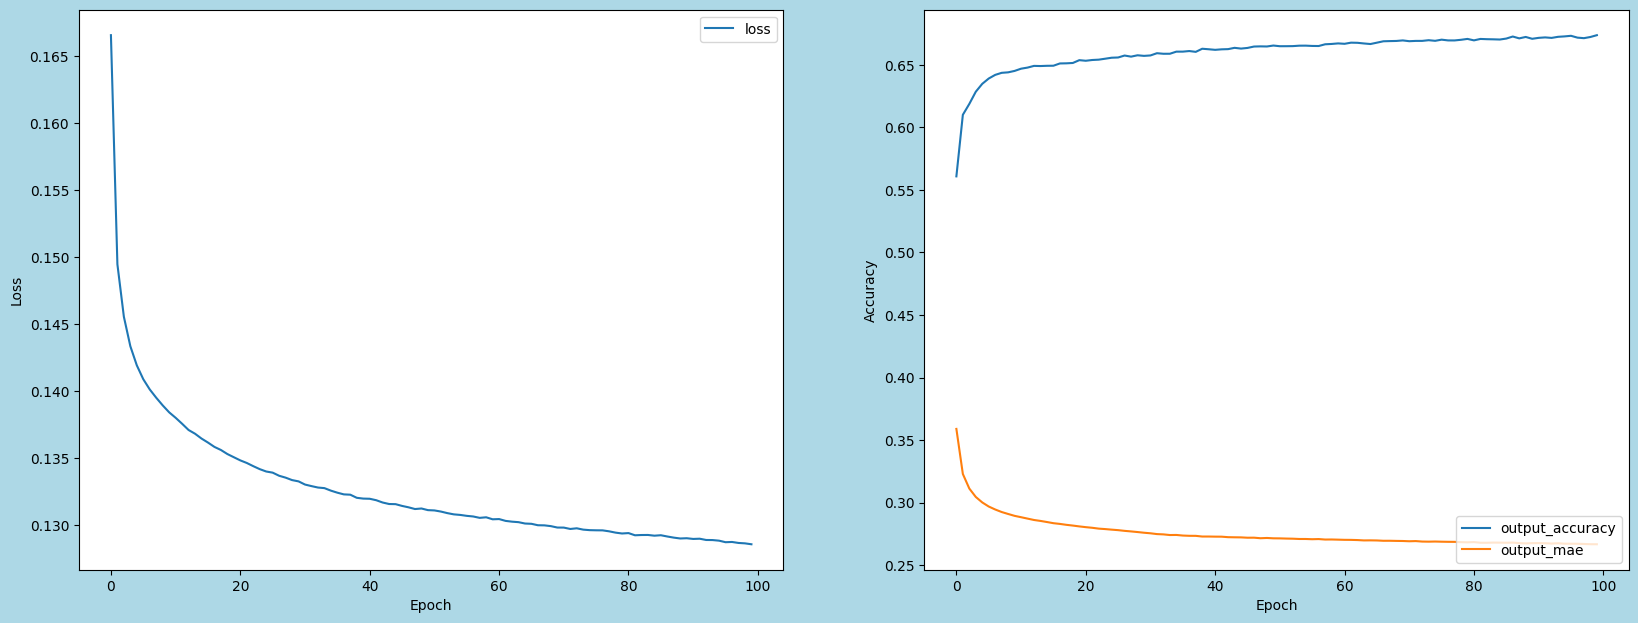

In [10]:
sl.printLearnData(history)

In [ ]:
predictions = sl.predict(model, input_board, input_move)

In [10]:
predictions = model.predict(input_board, verbose=0)

C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_7772\3574649968.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (13, 5), facecolor= 'lightblue')


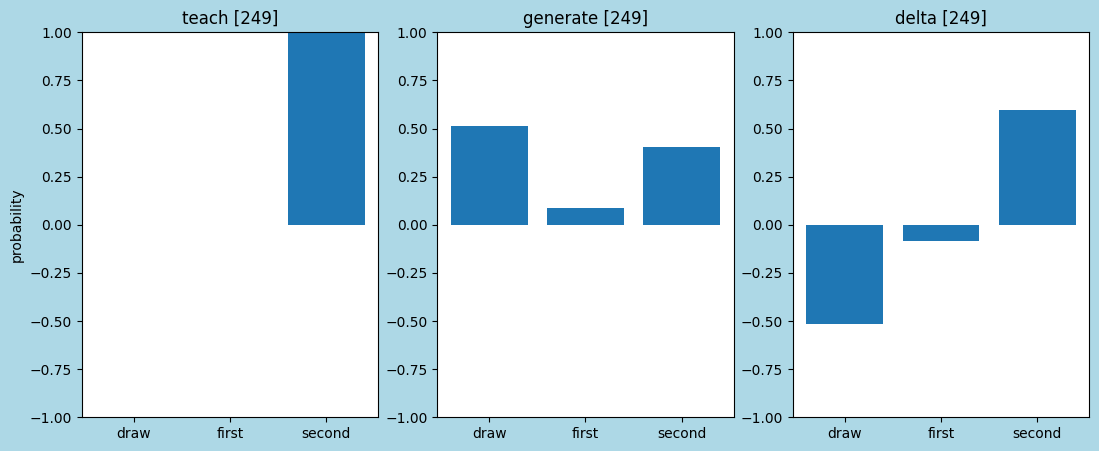

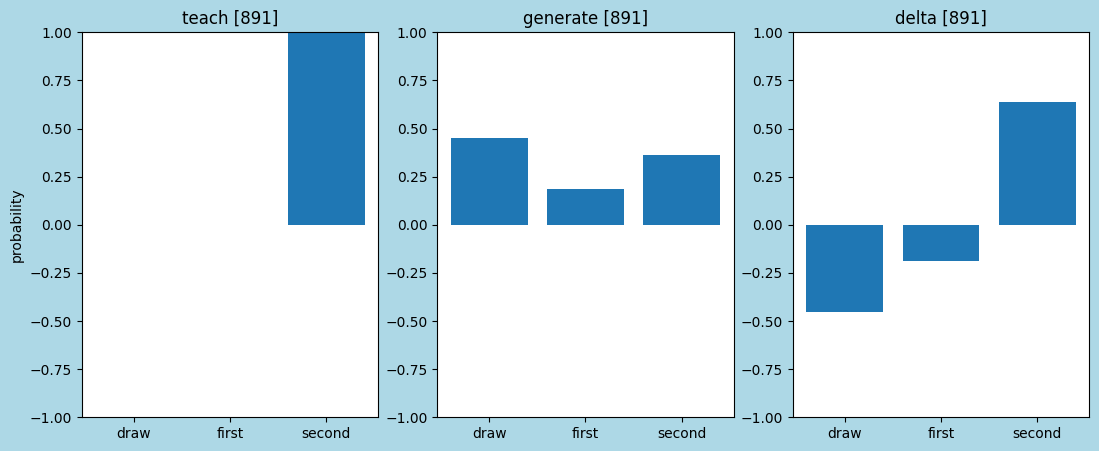

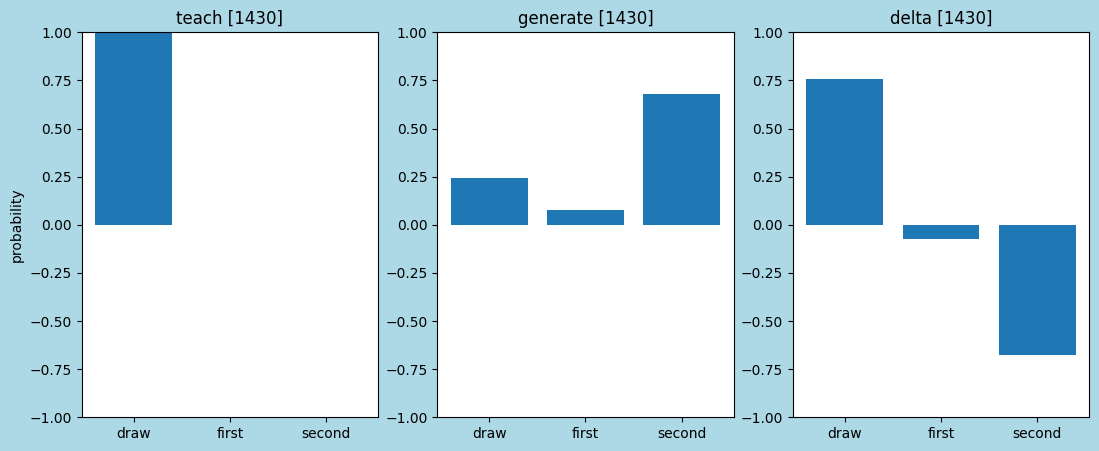

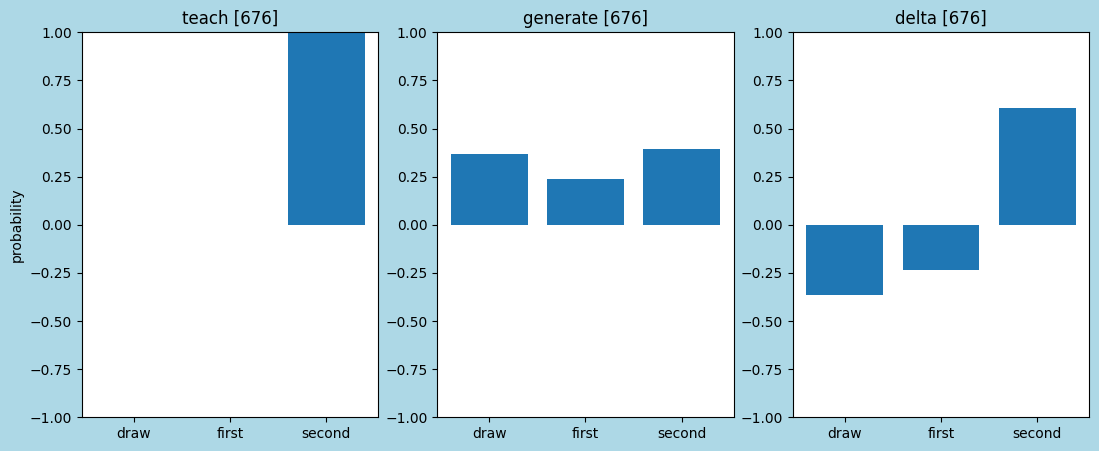

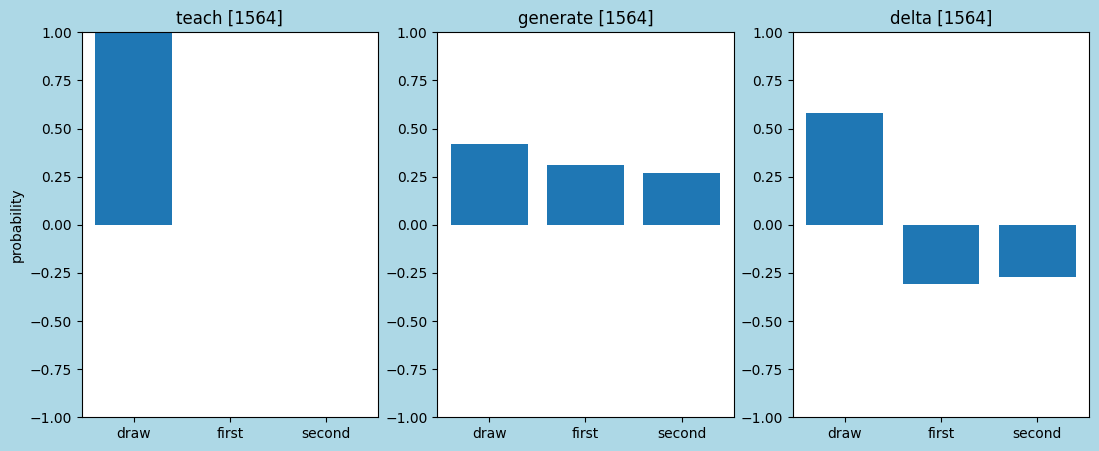

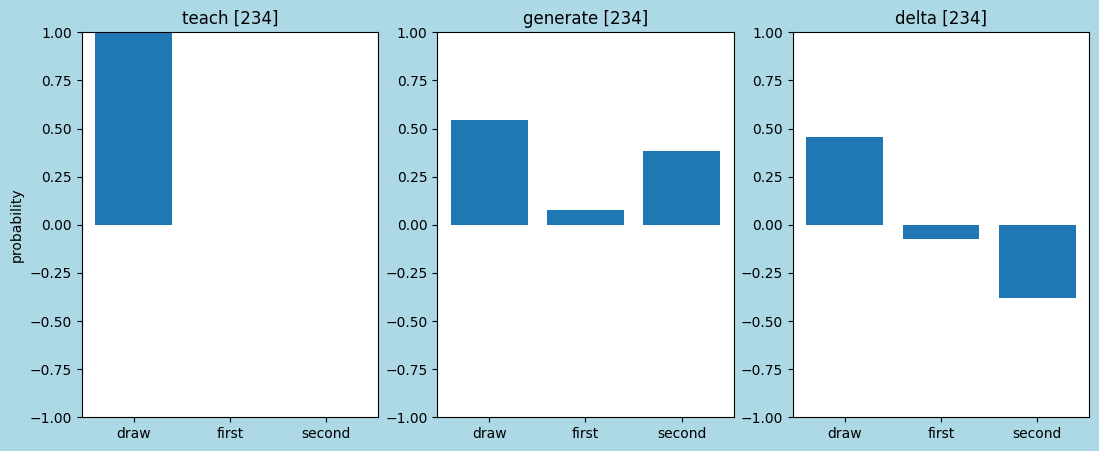

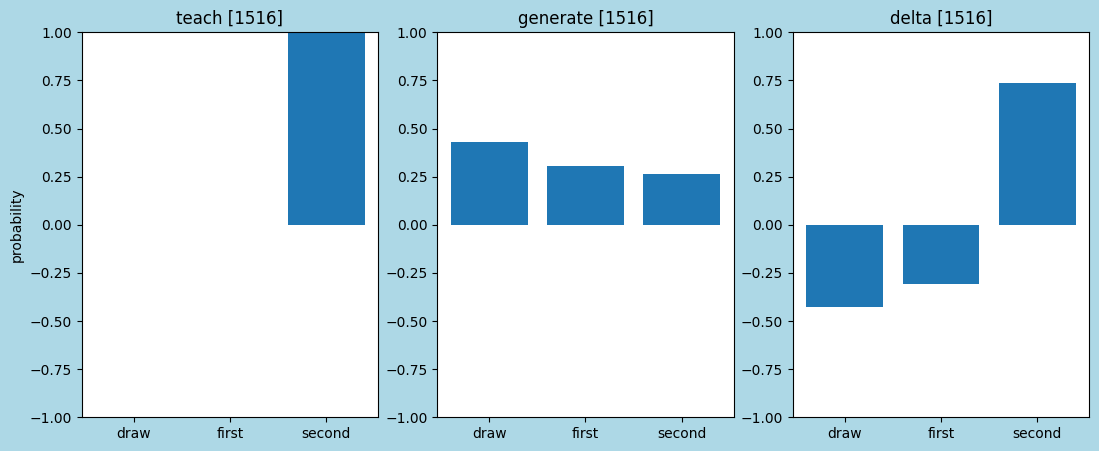

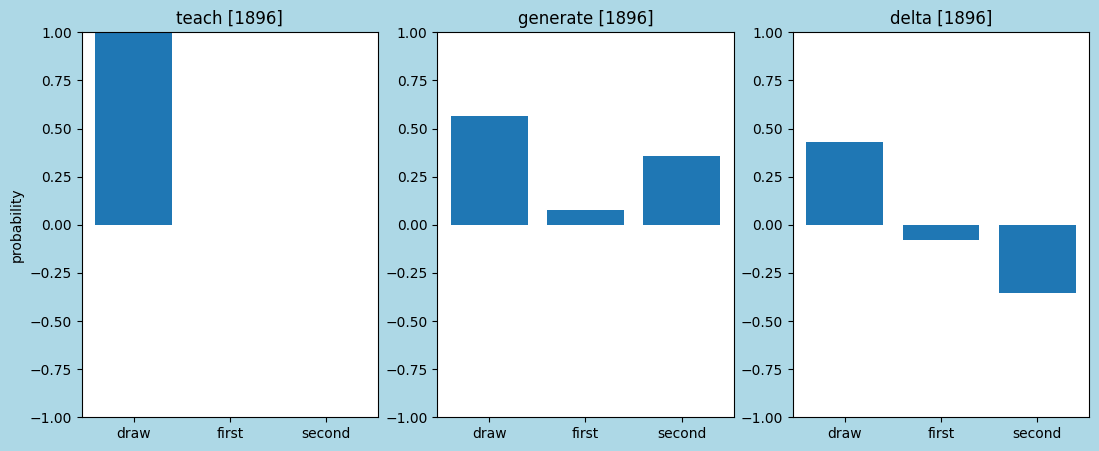

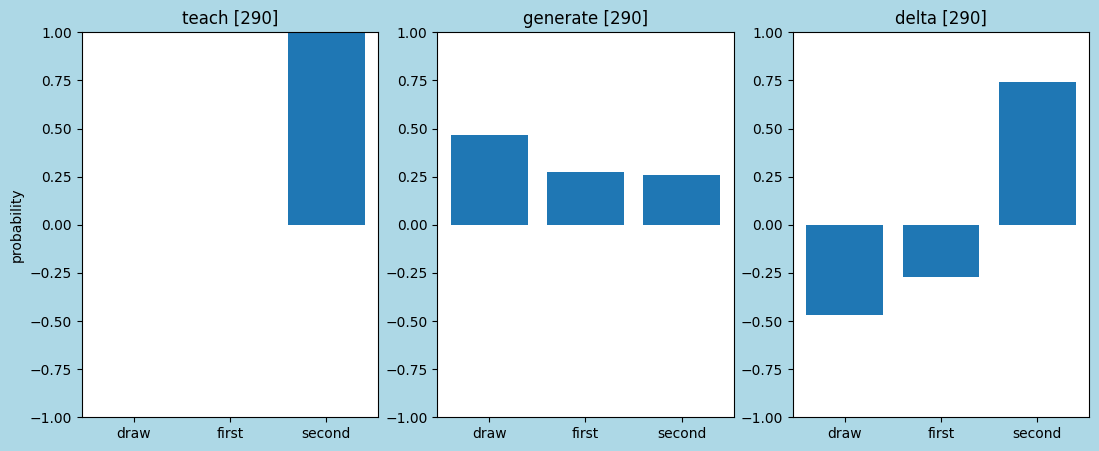

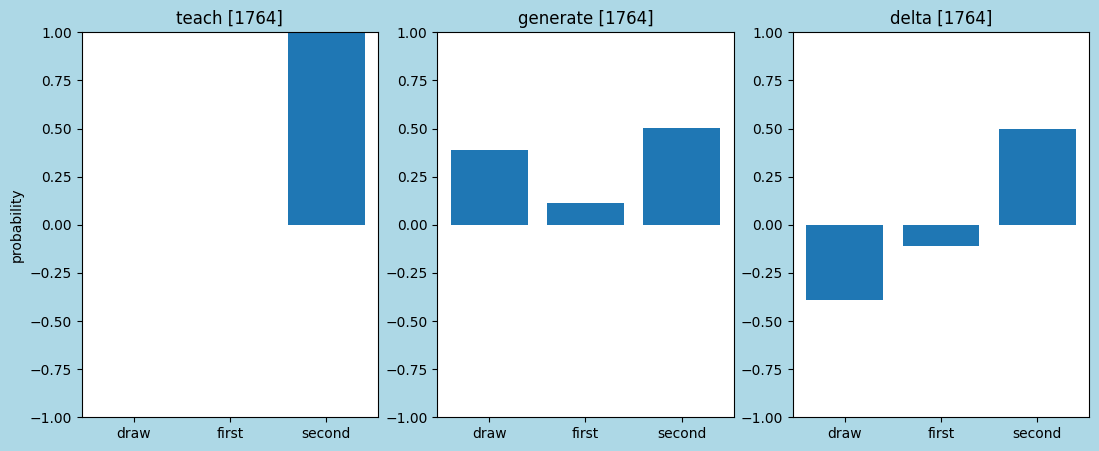

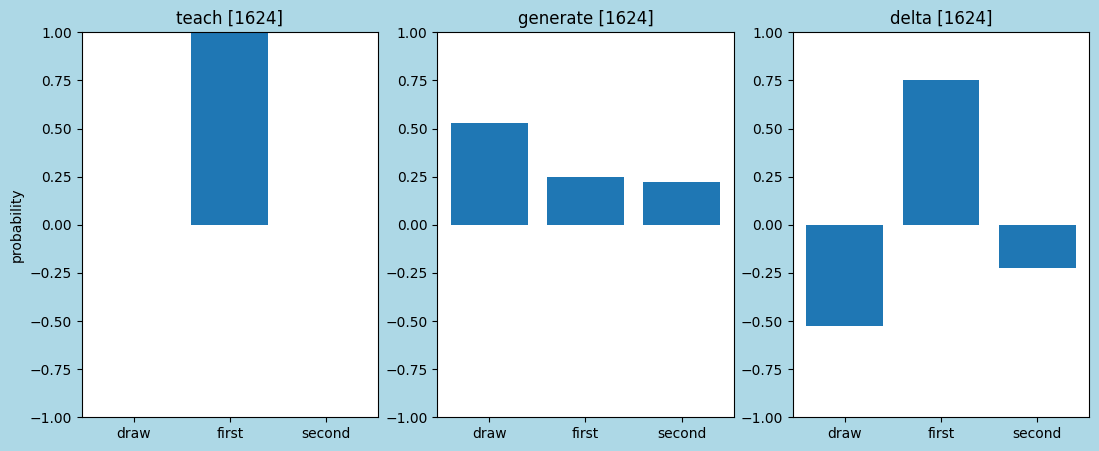

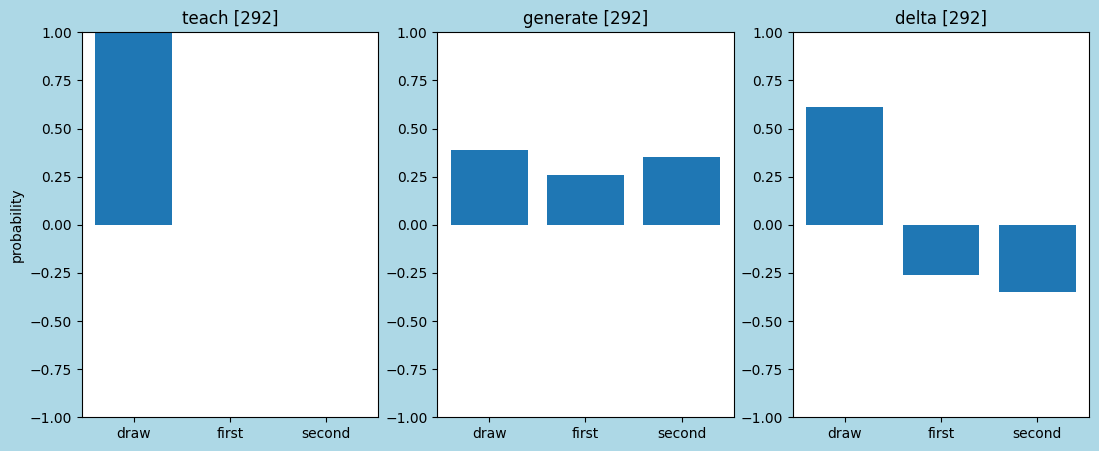

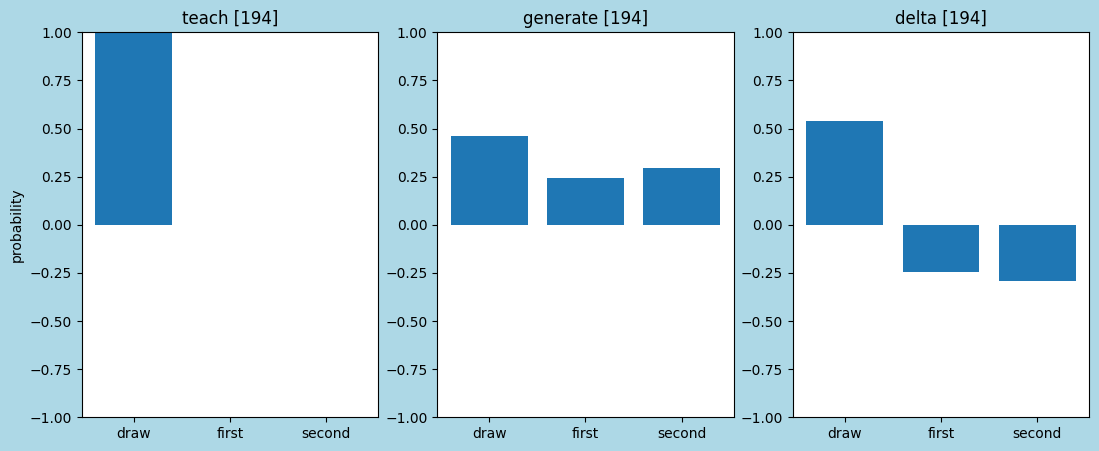

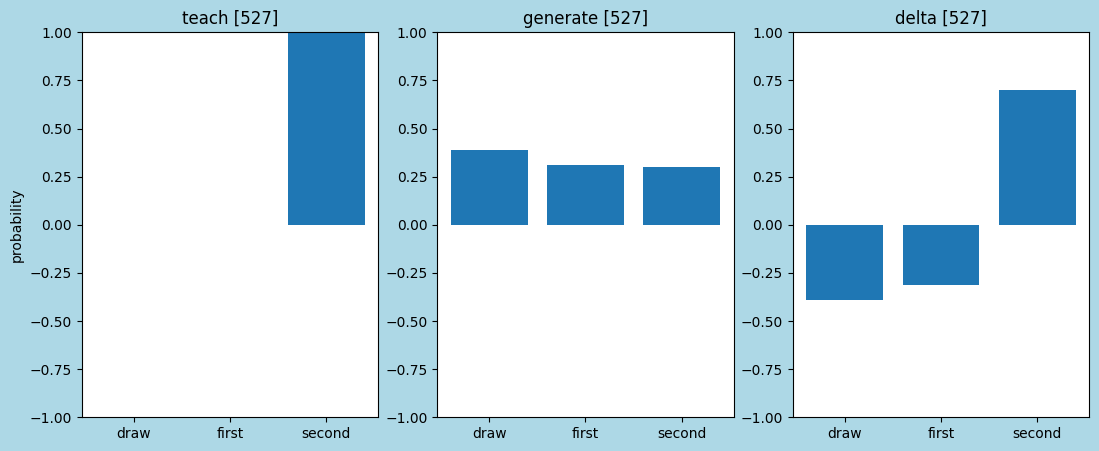

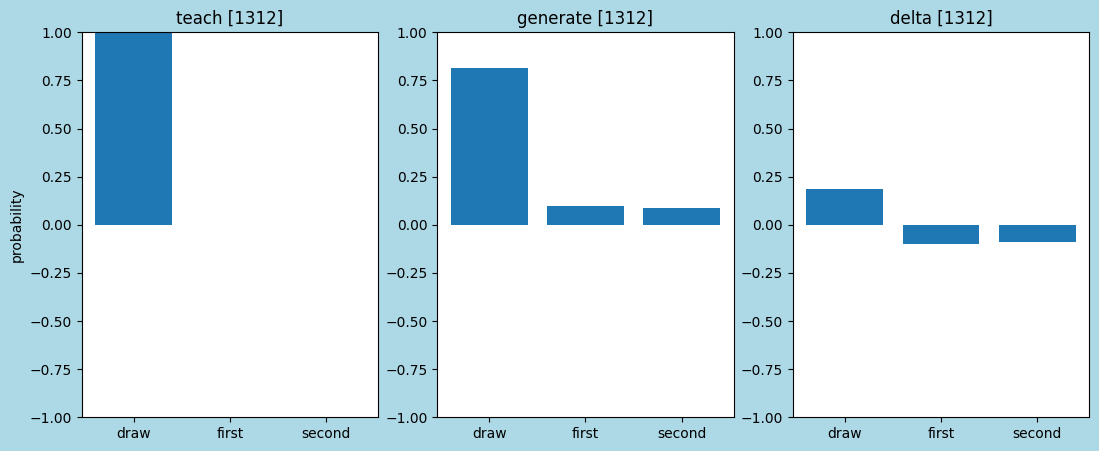

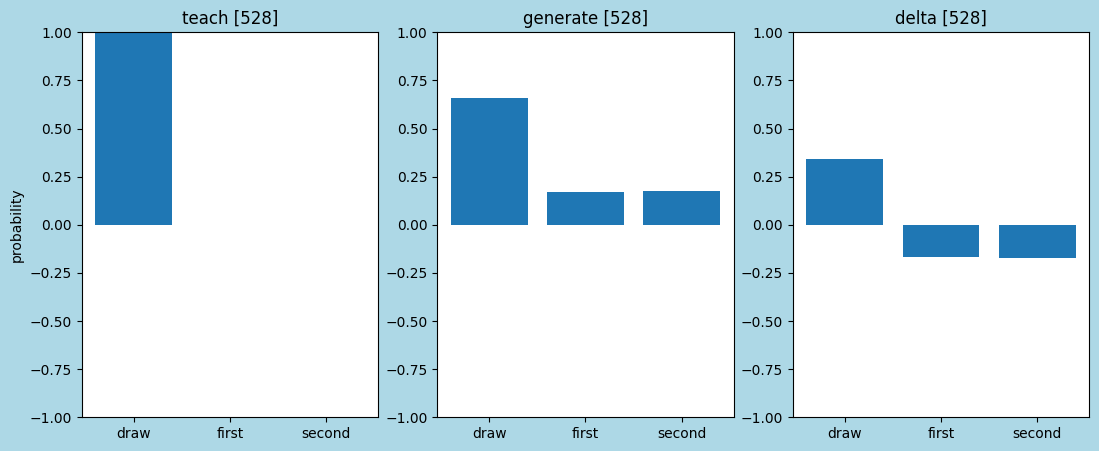

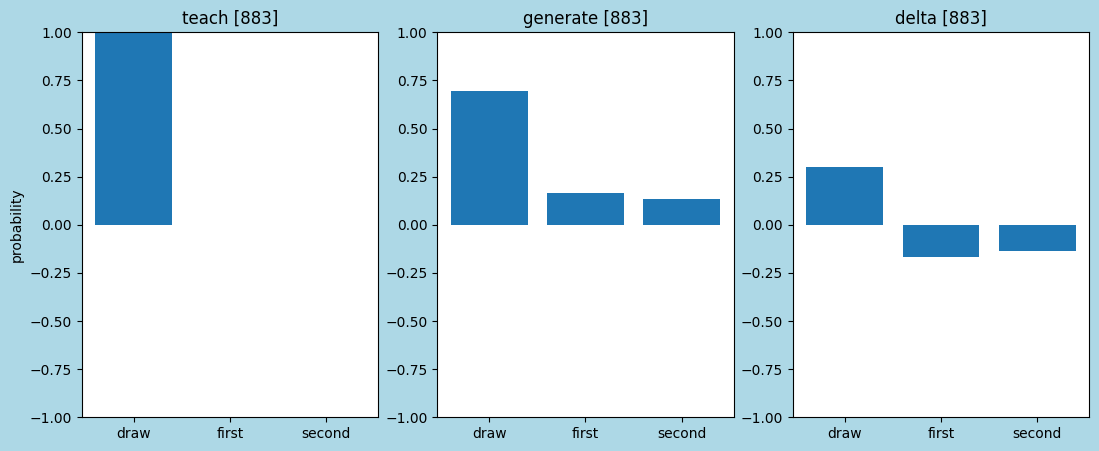

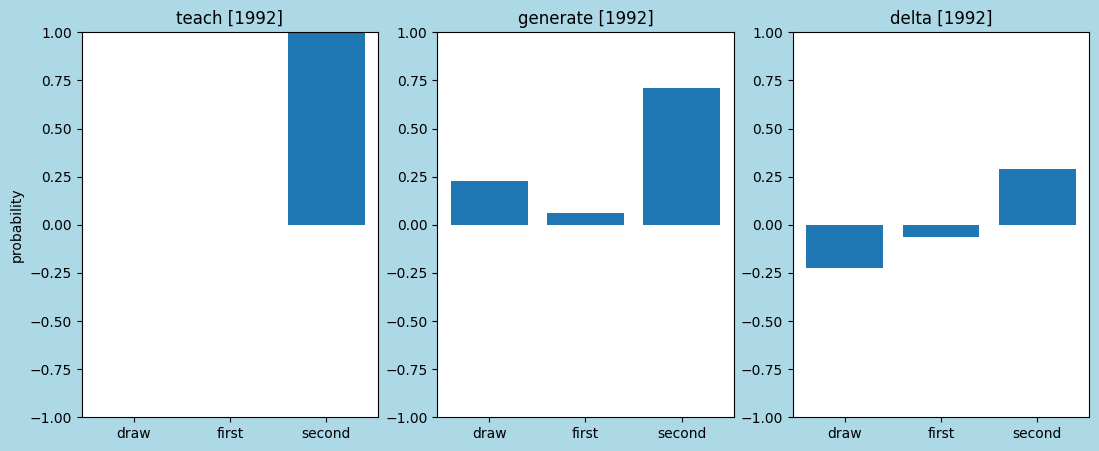

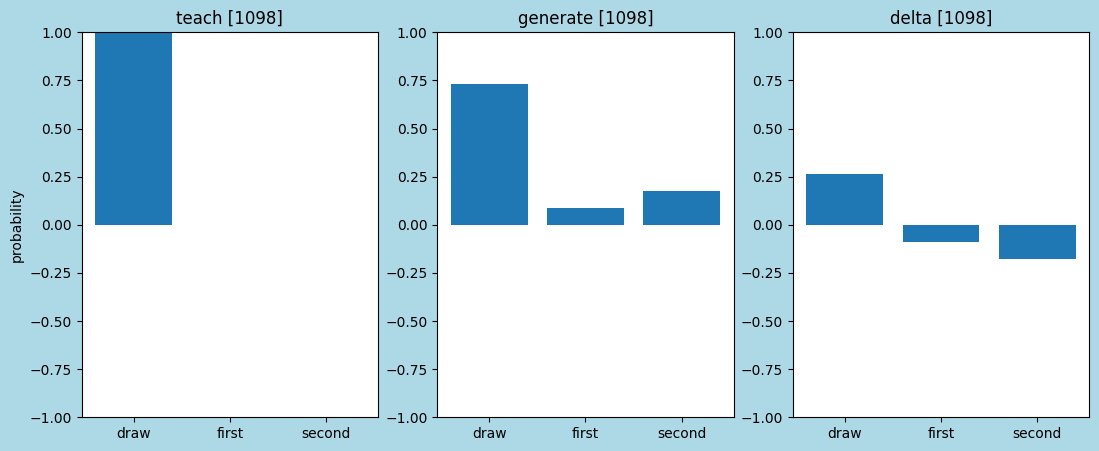

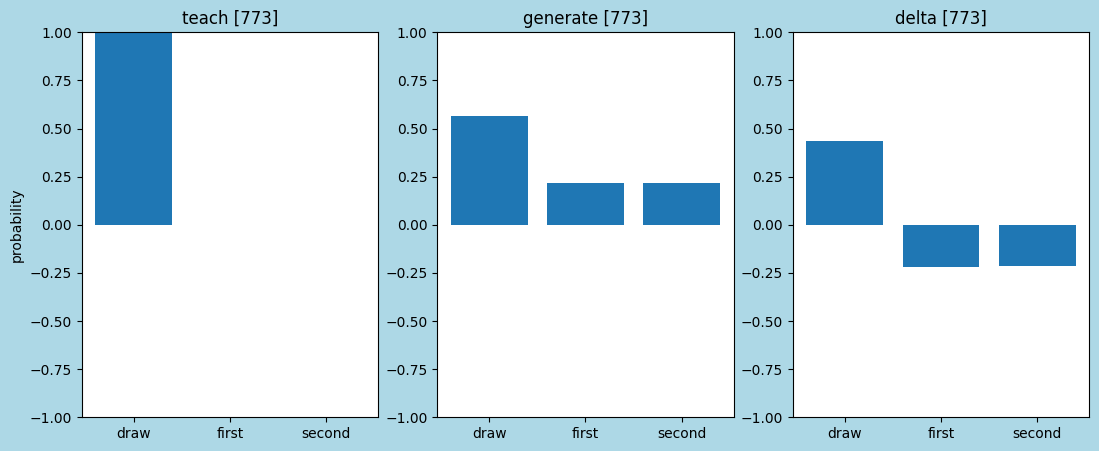

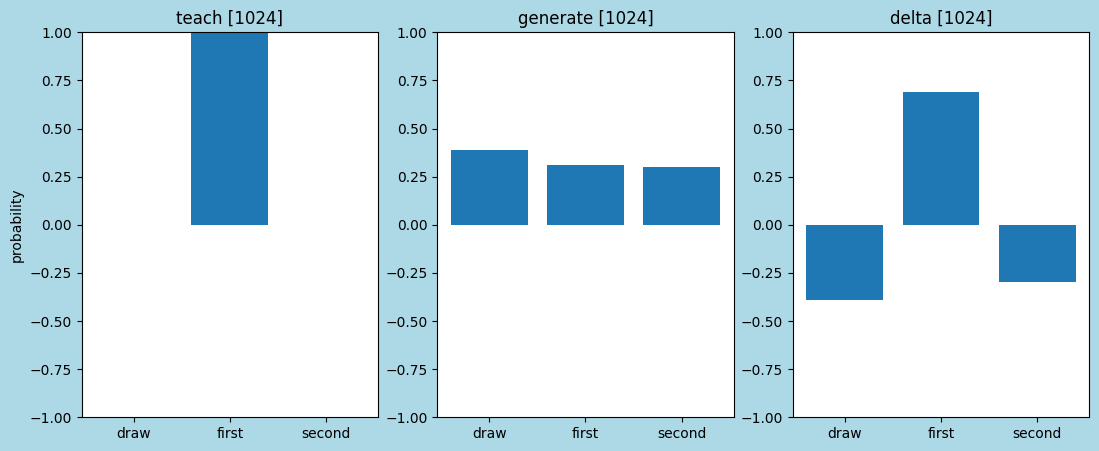

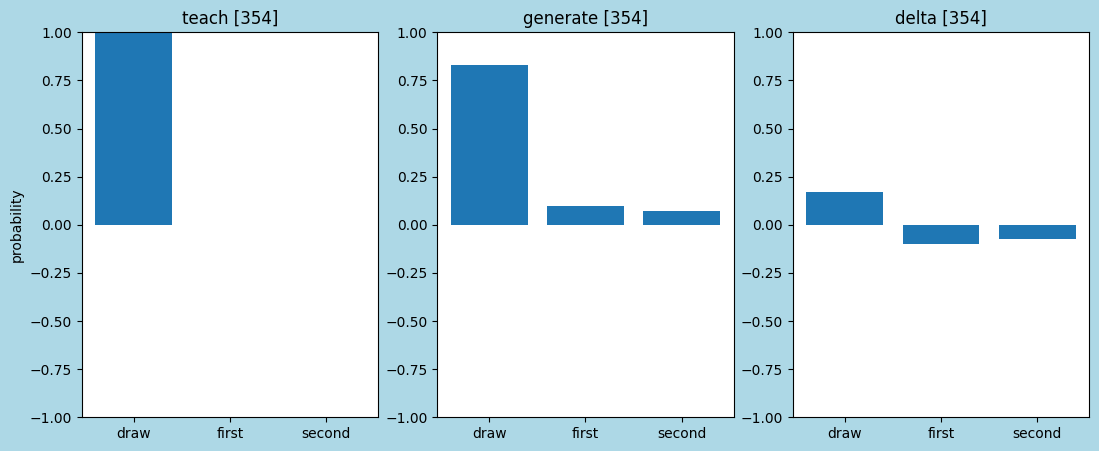

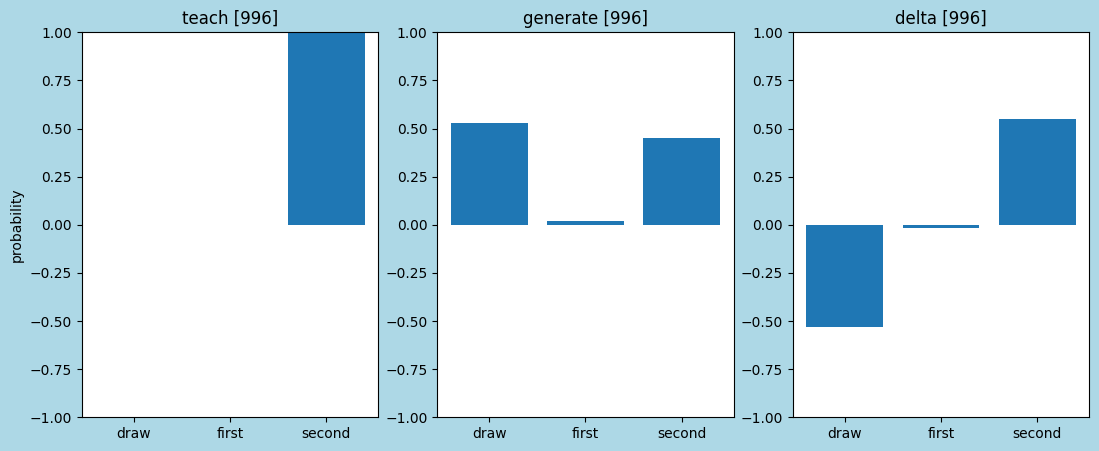

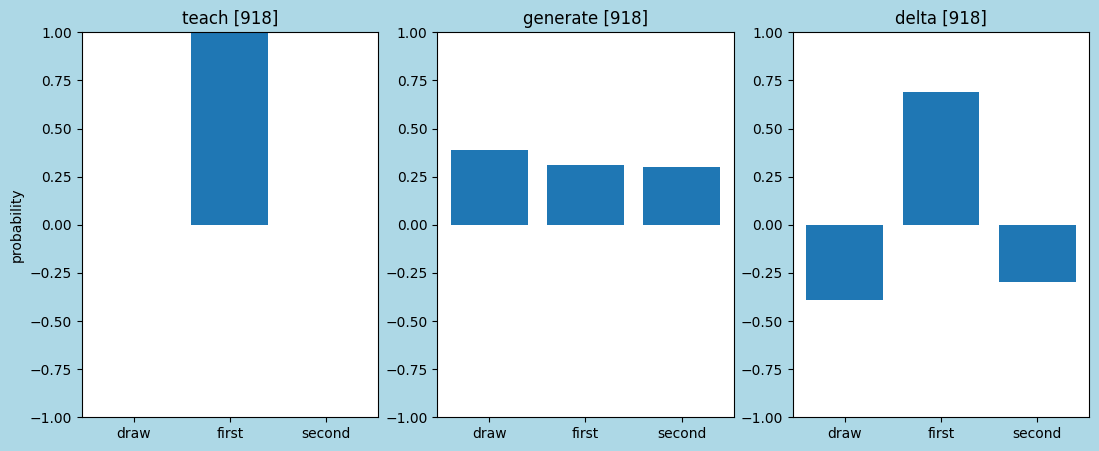

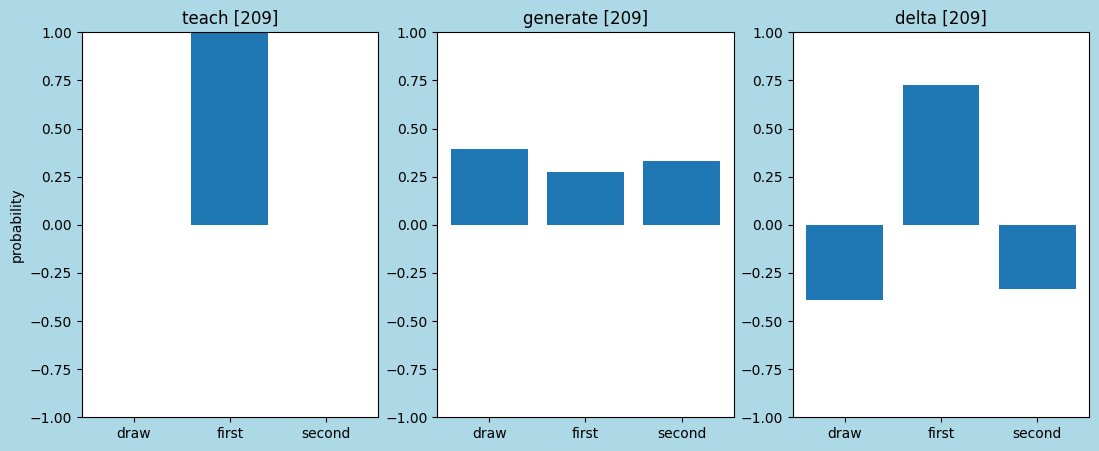

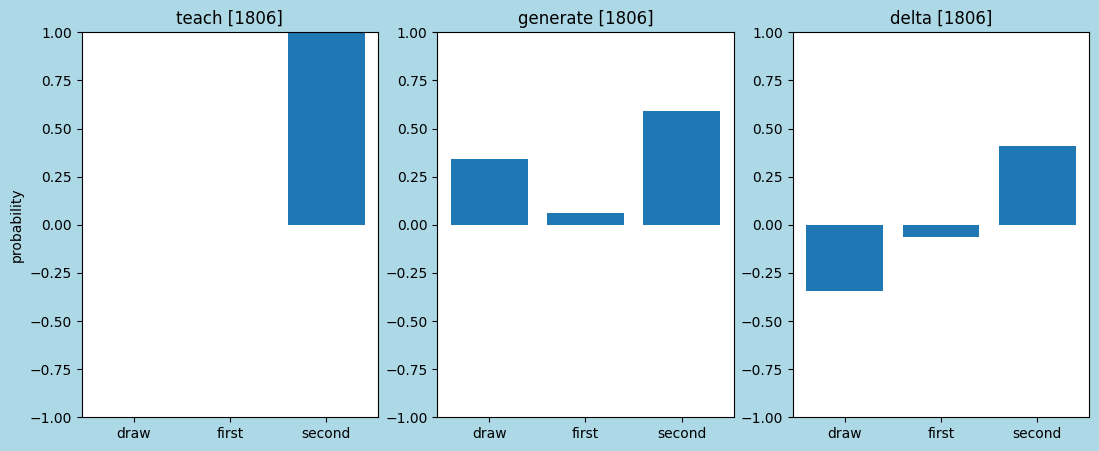

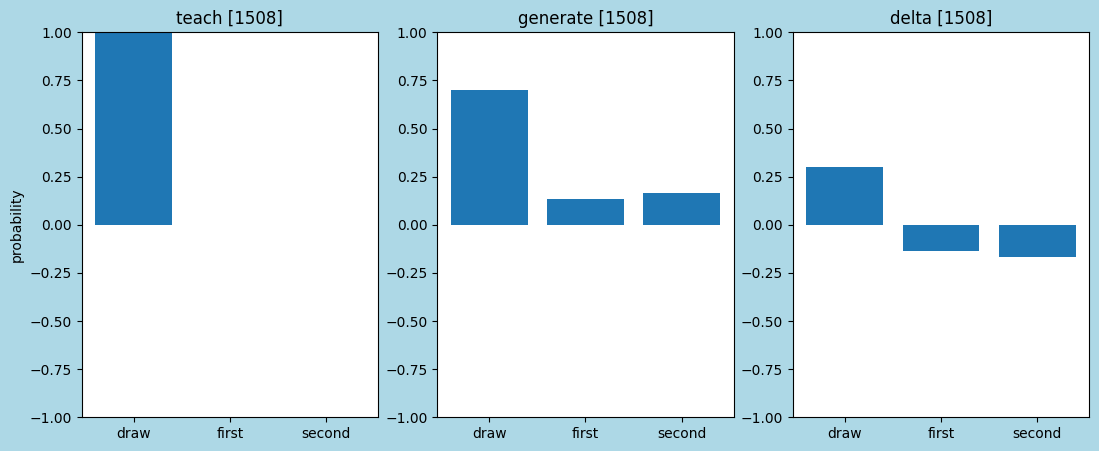

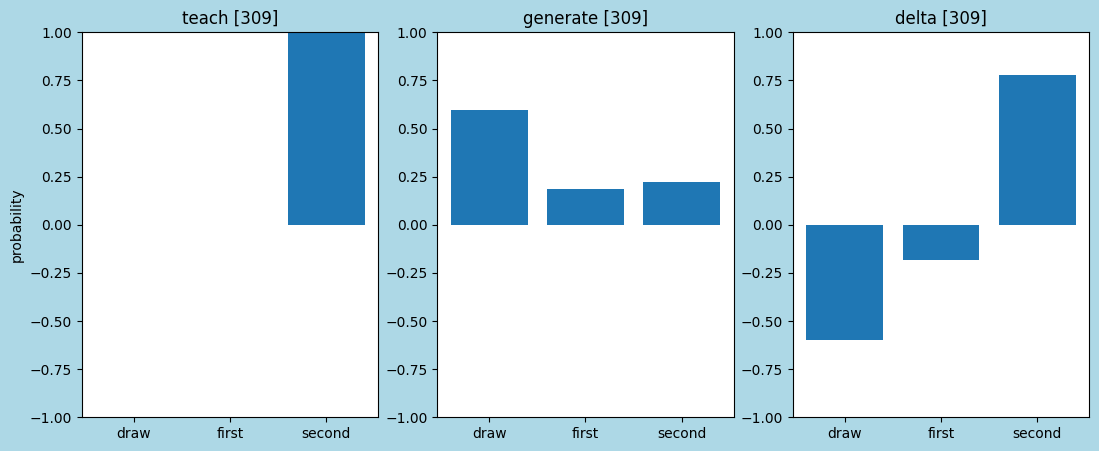

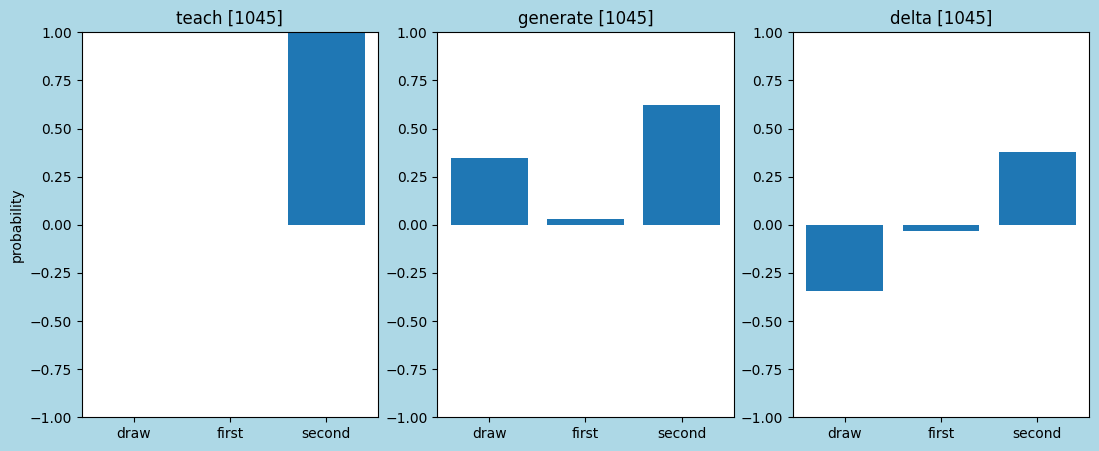

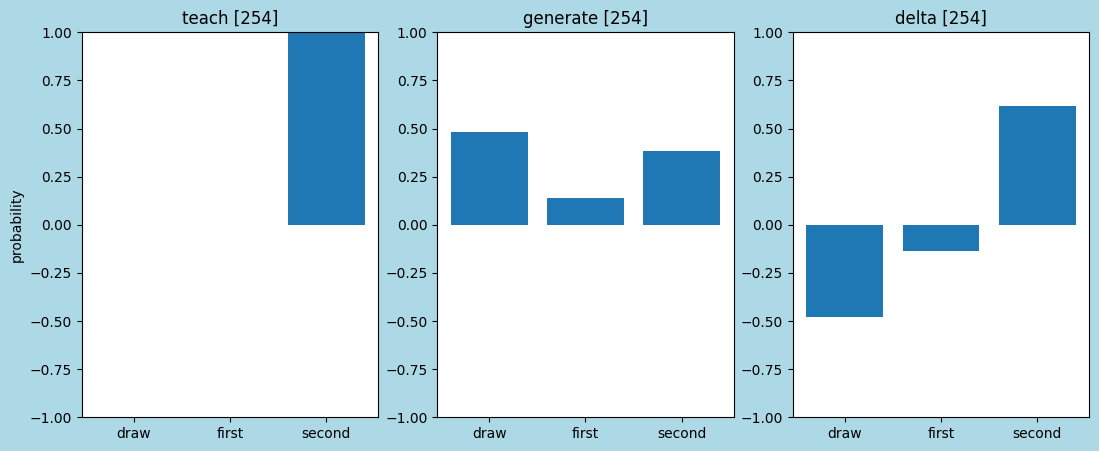

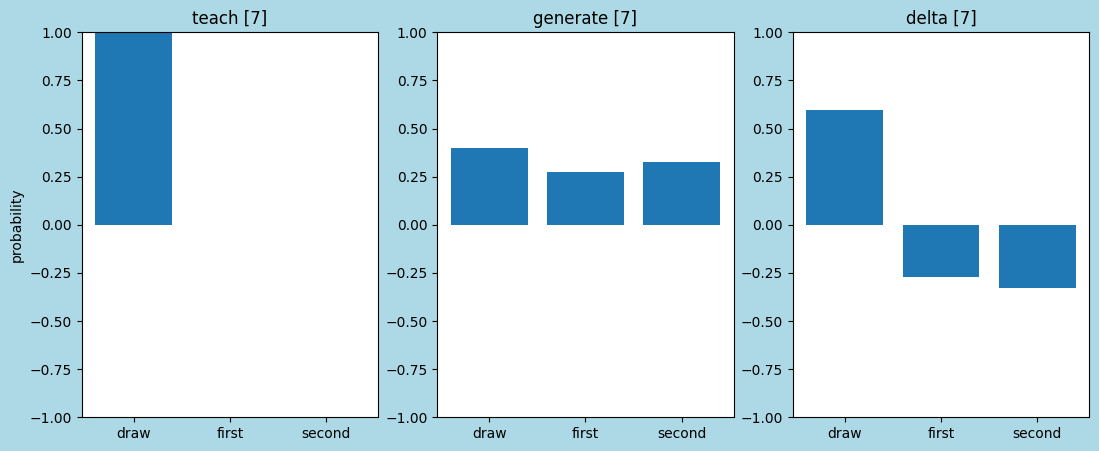

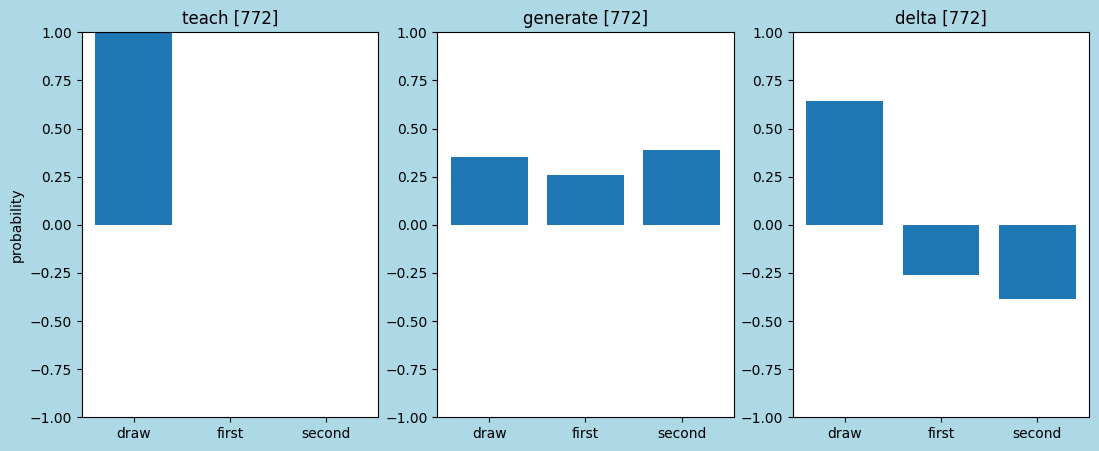

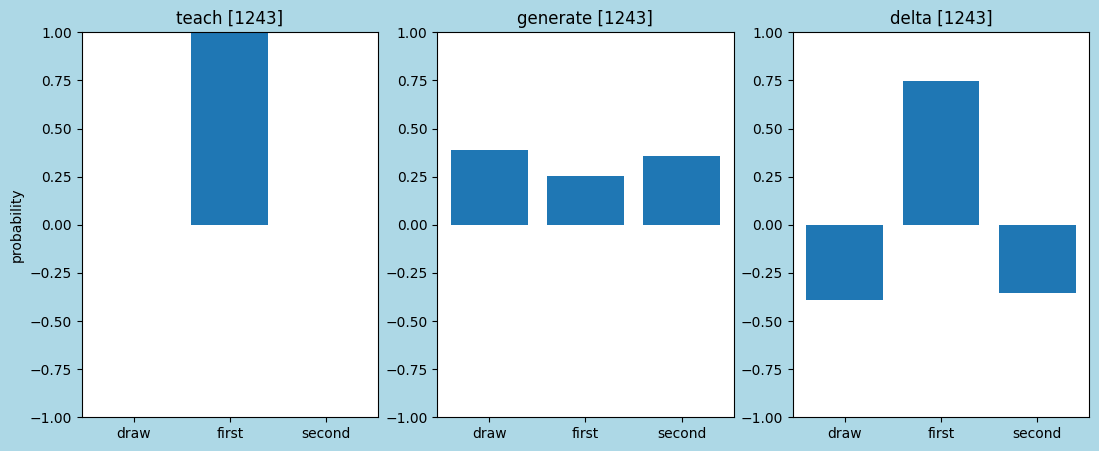

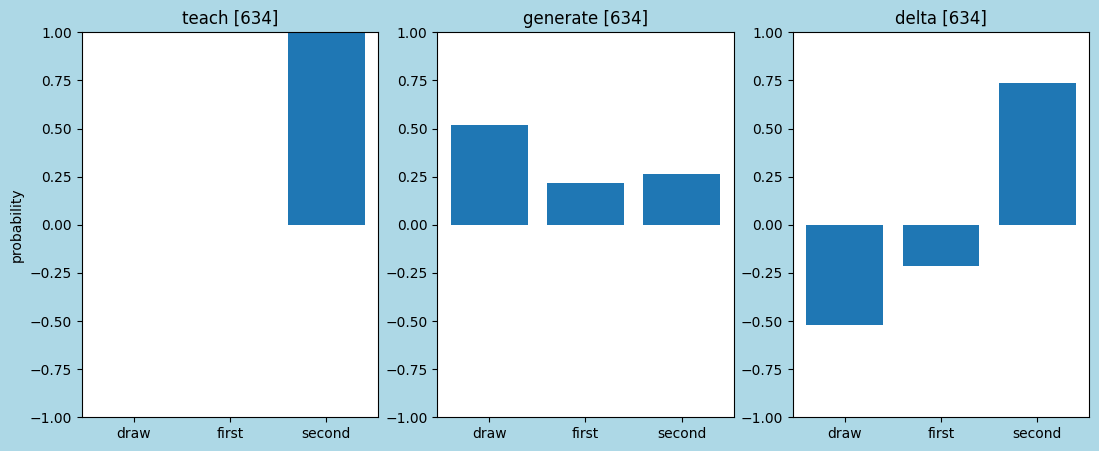

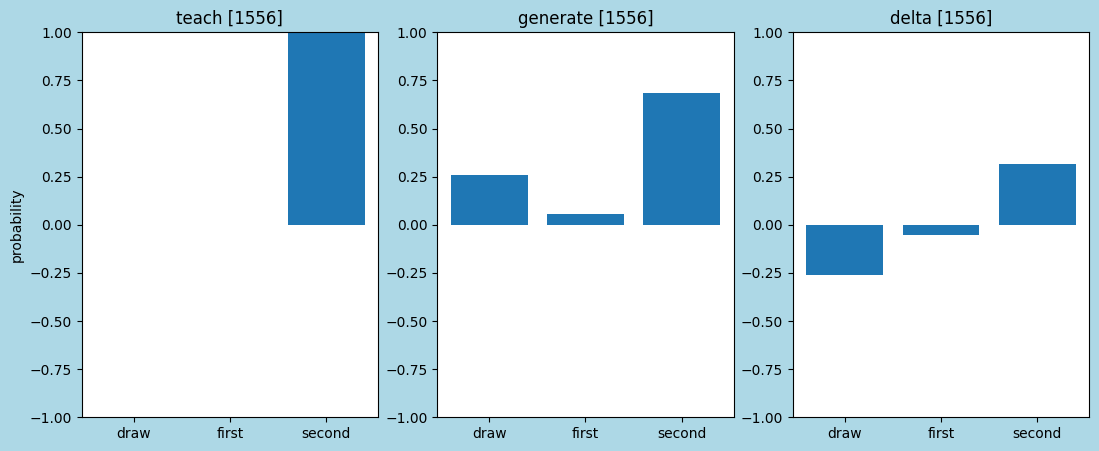

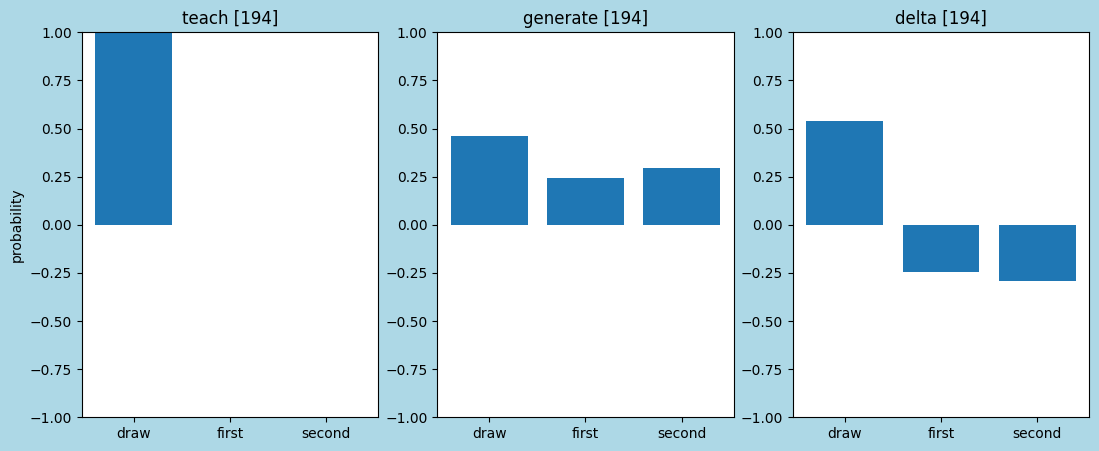

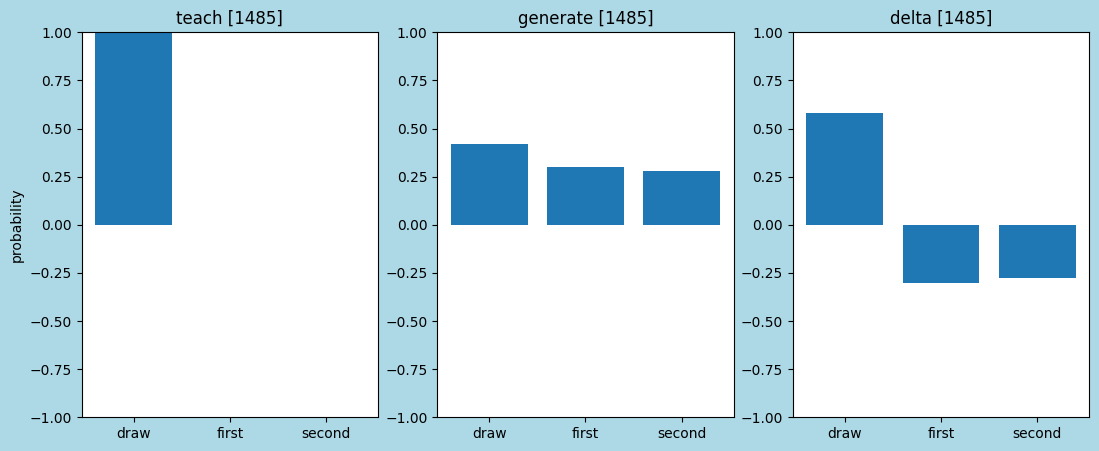

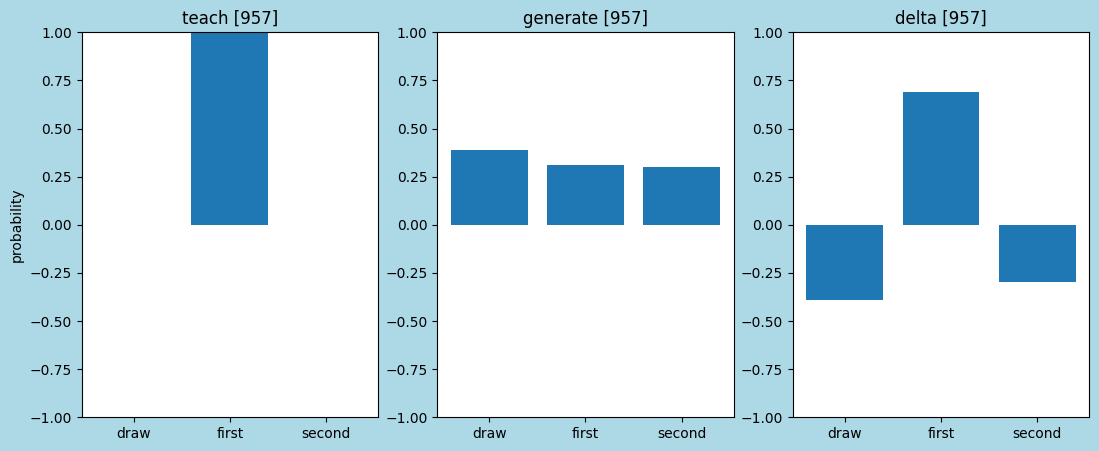

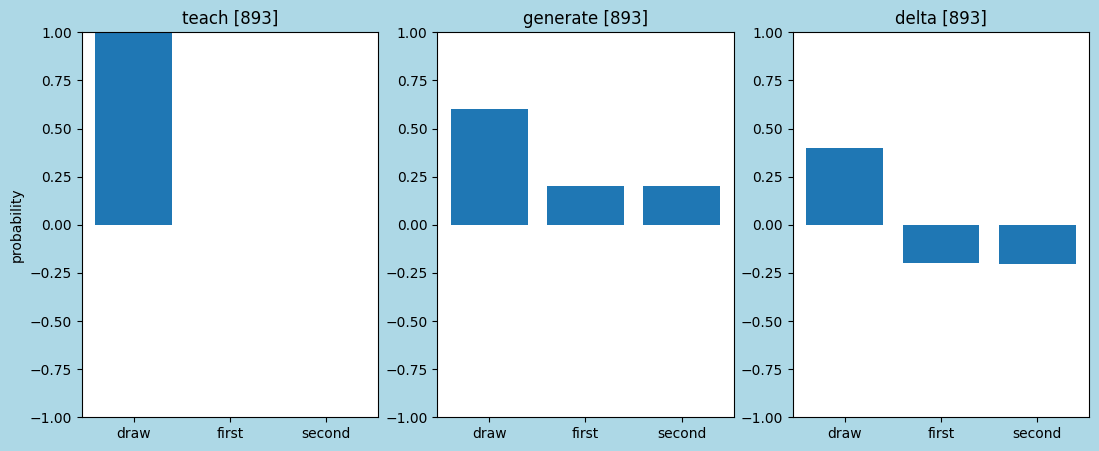

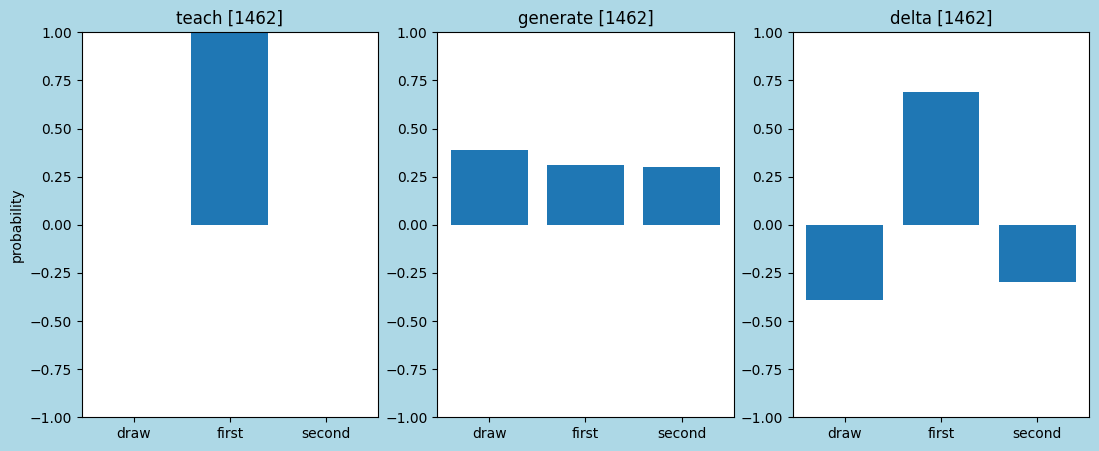

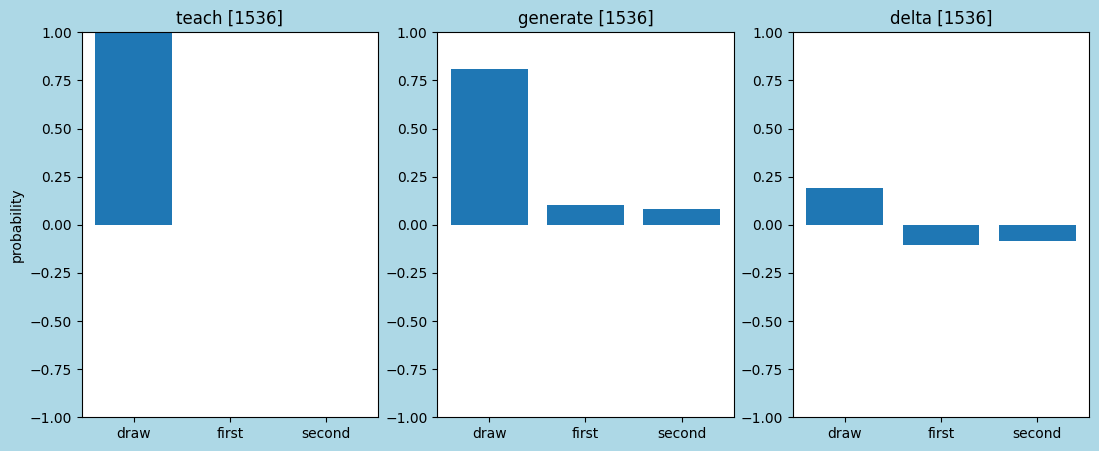

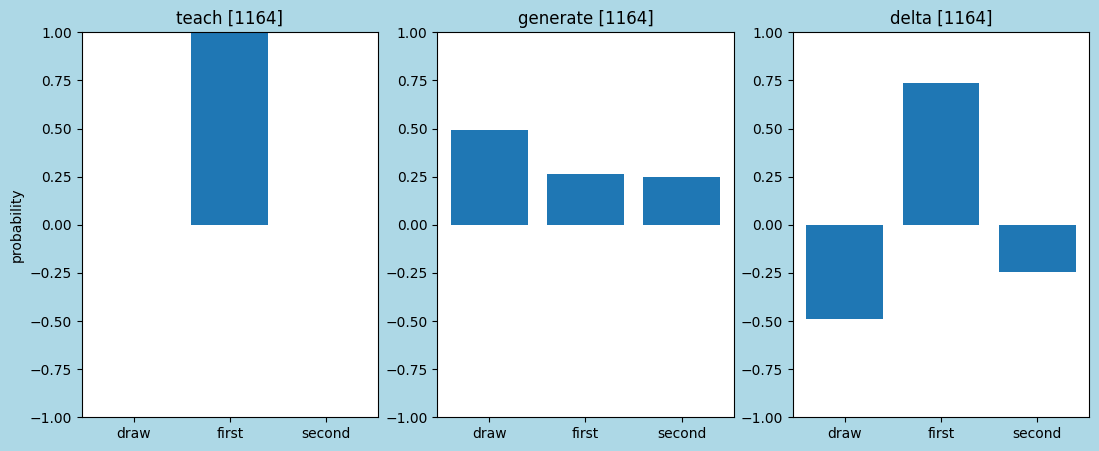

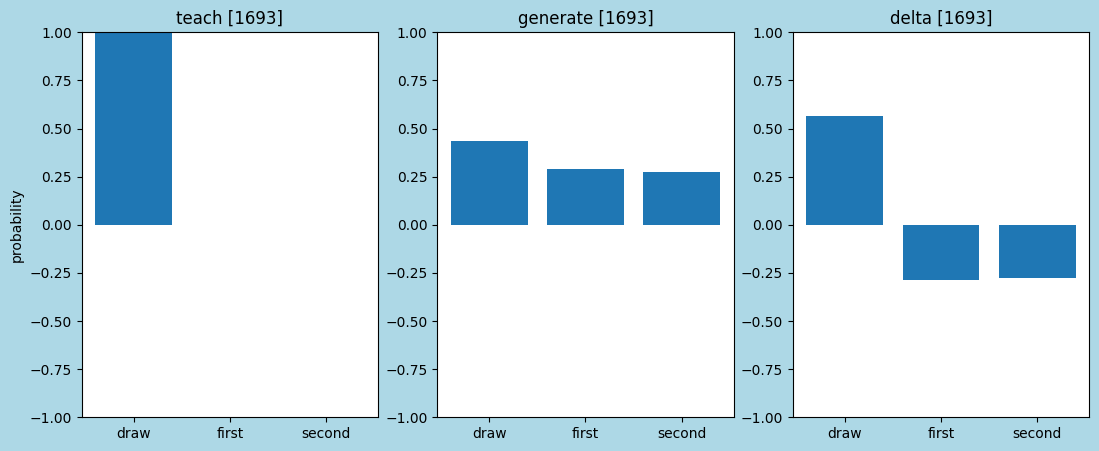

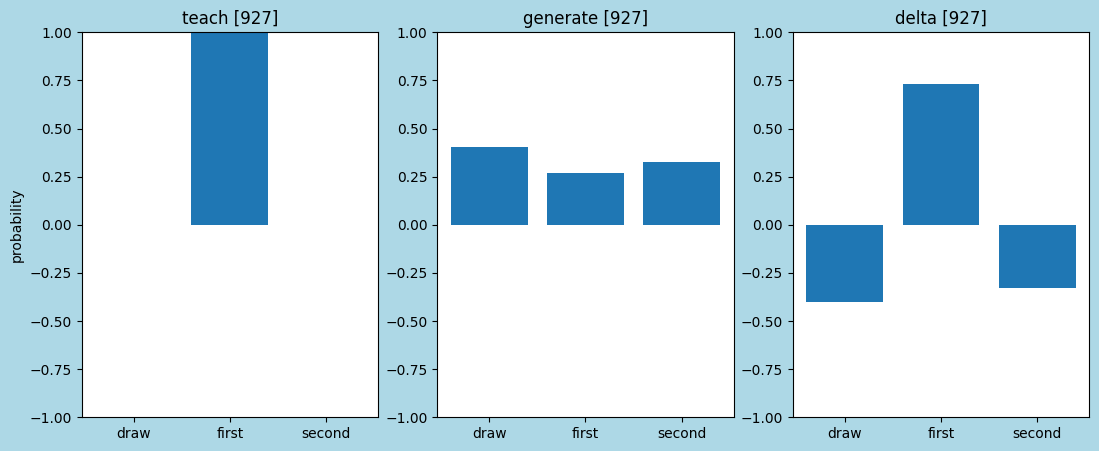

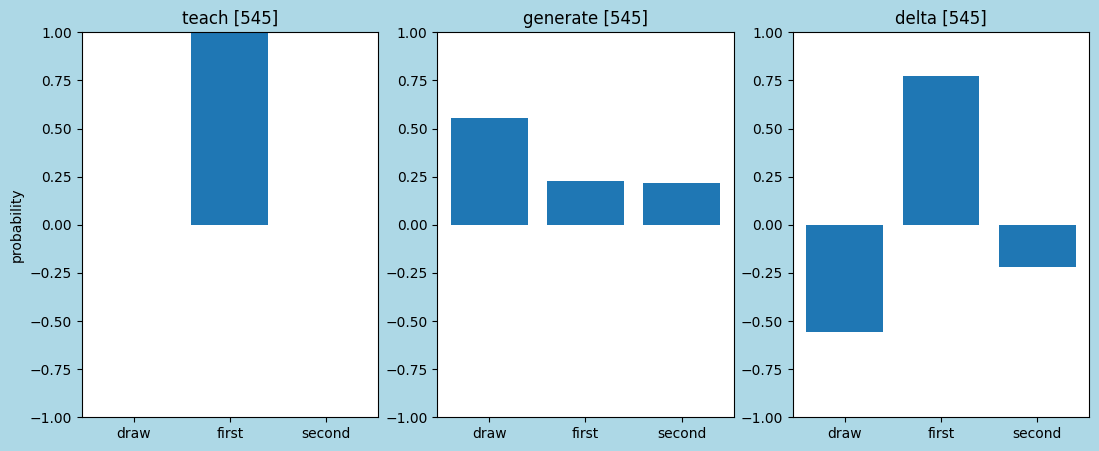

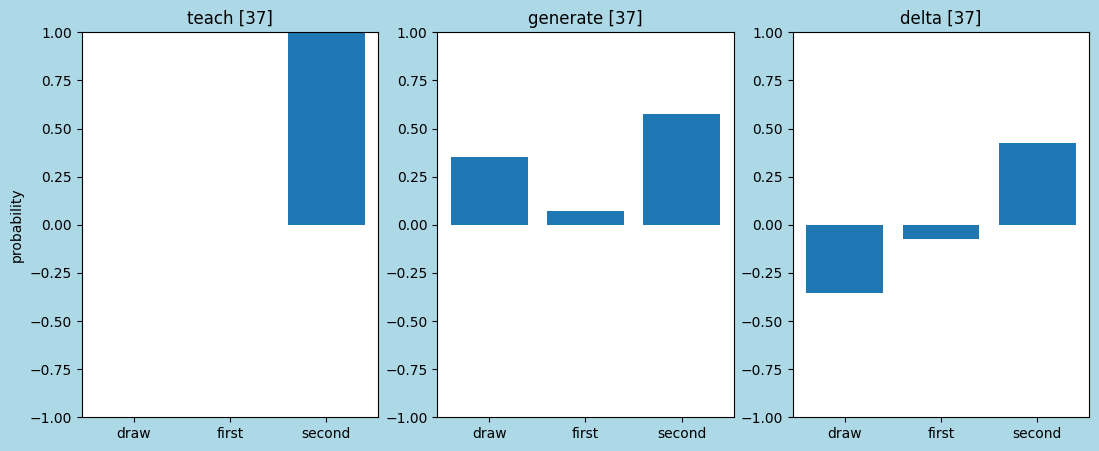

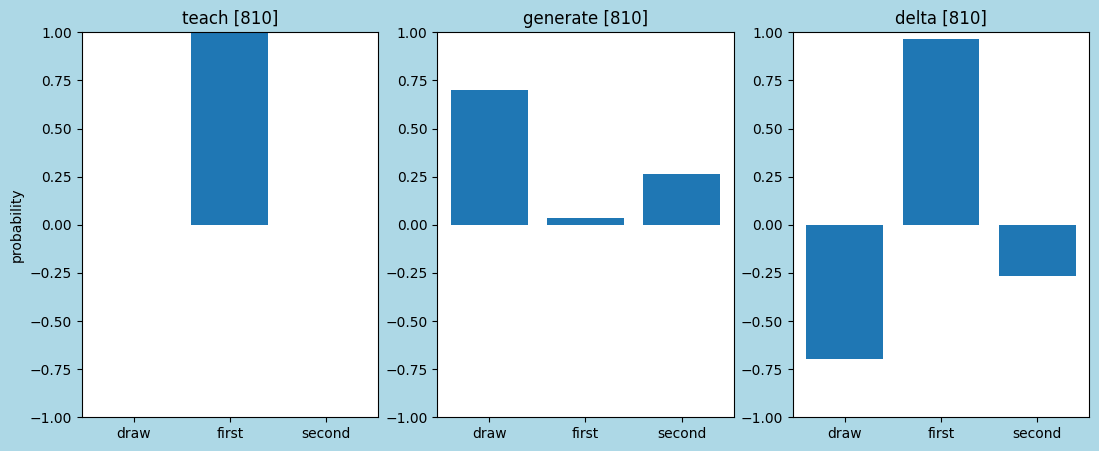

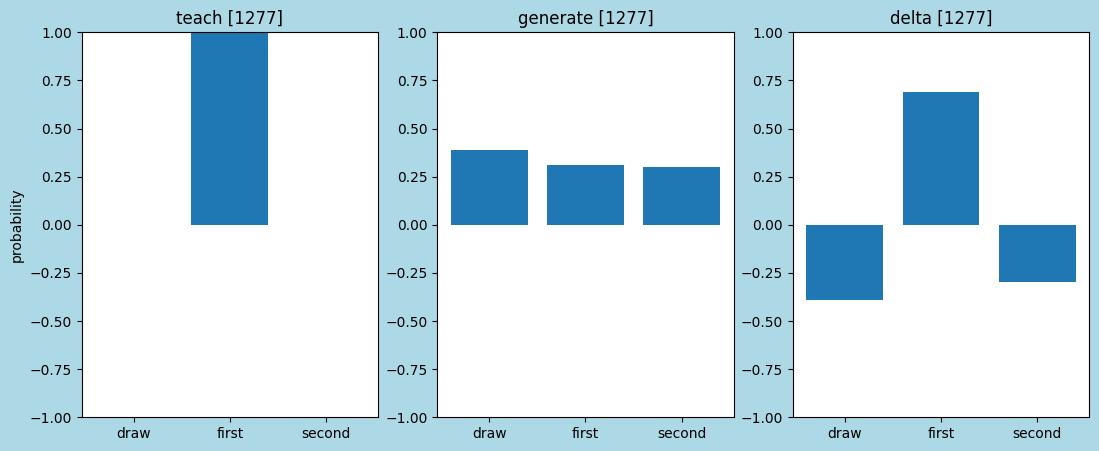

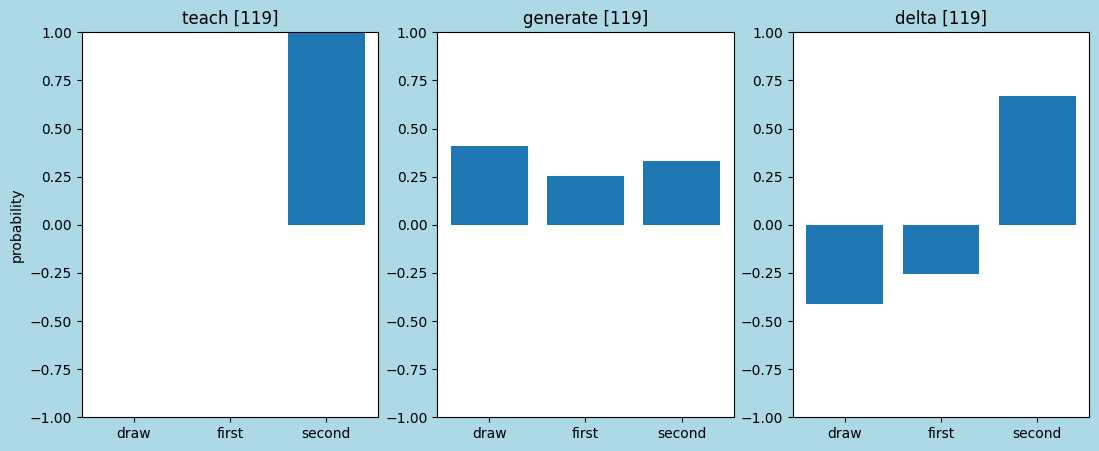

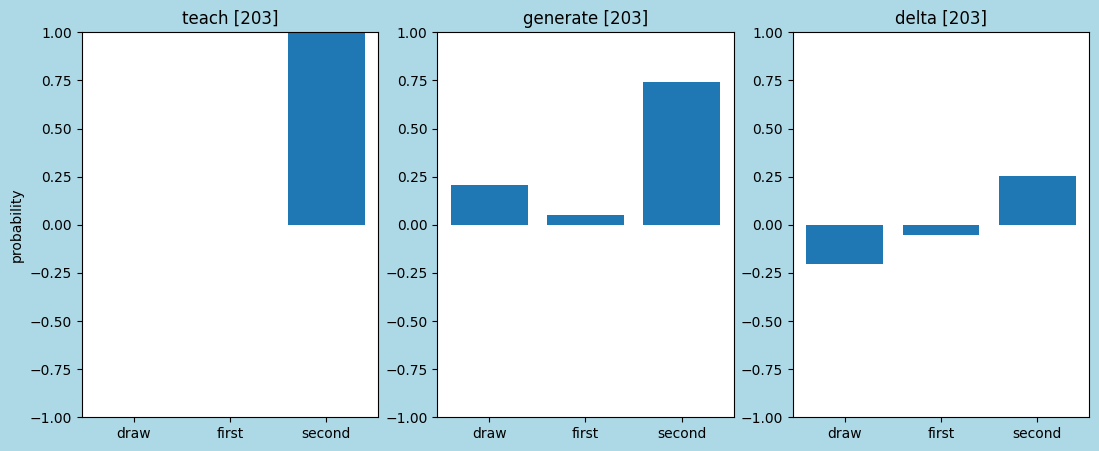

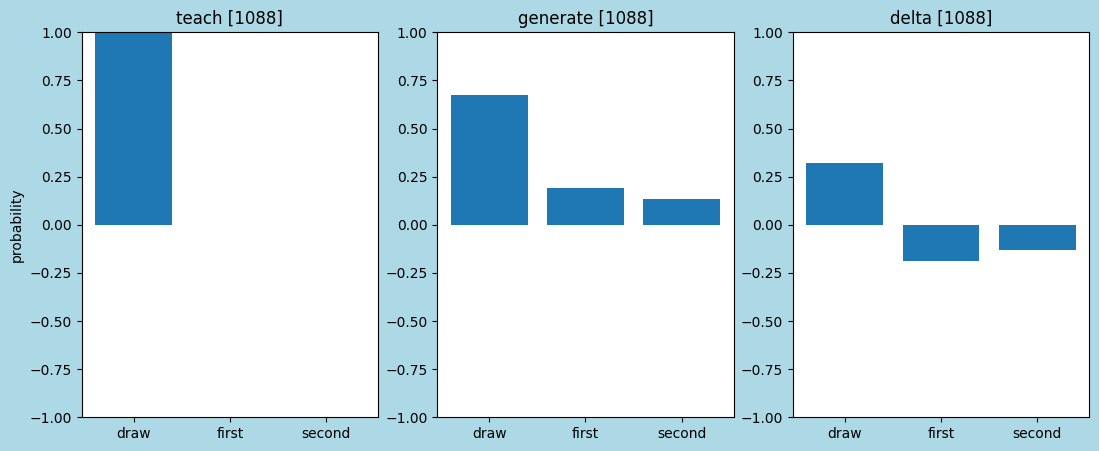

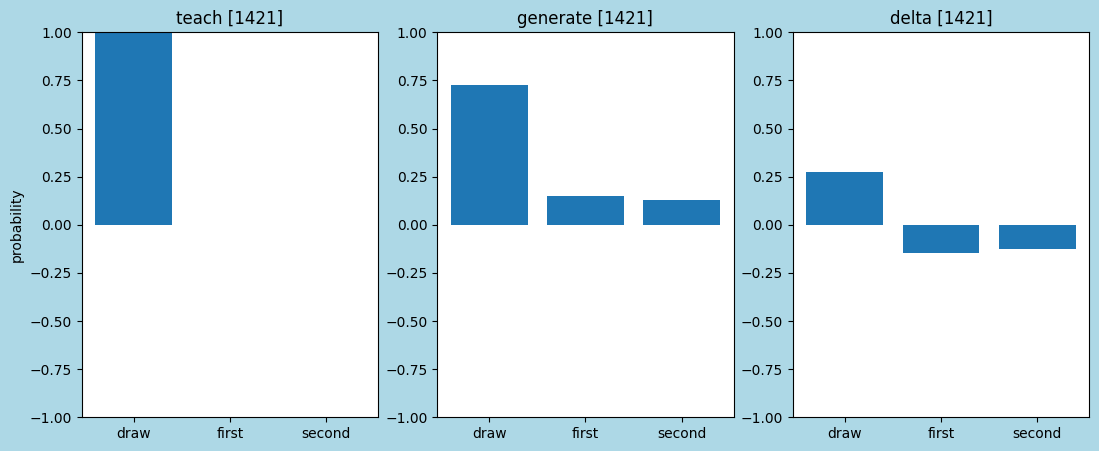

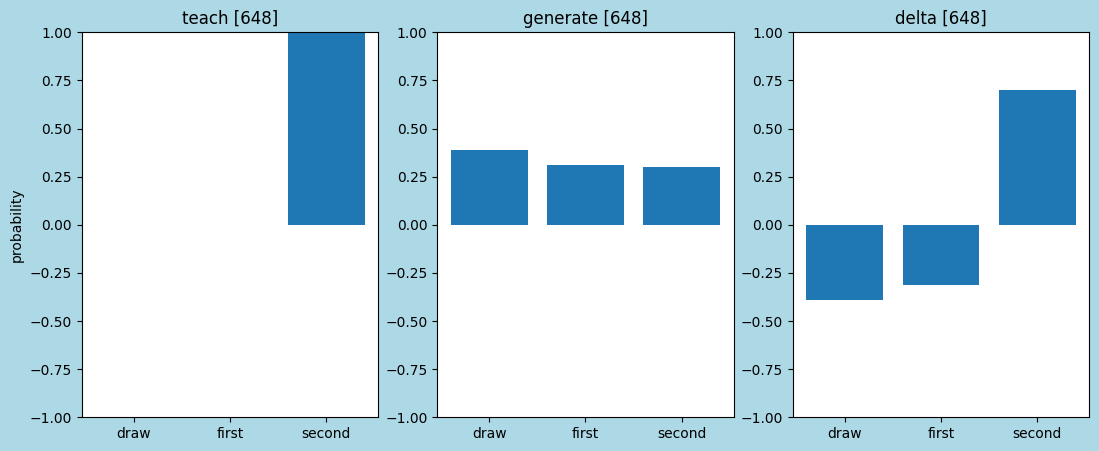

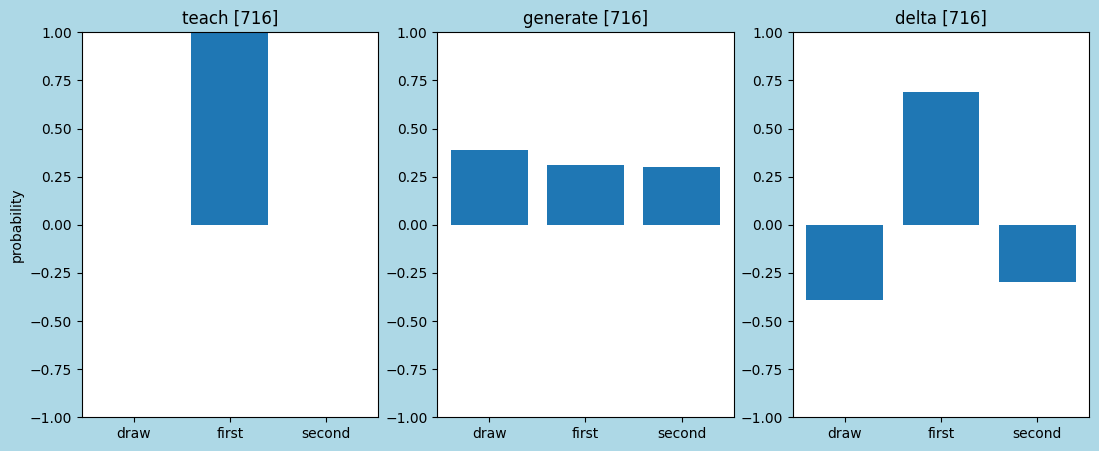

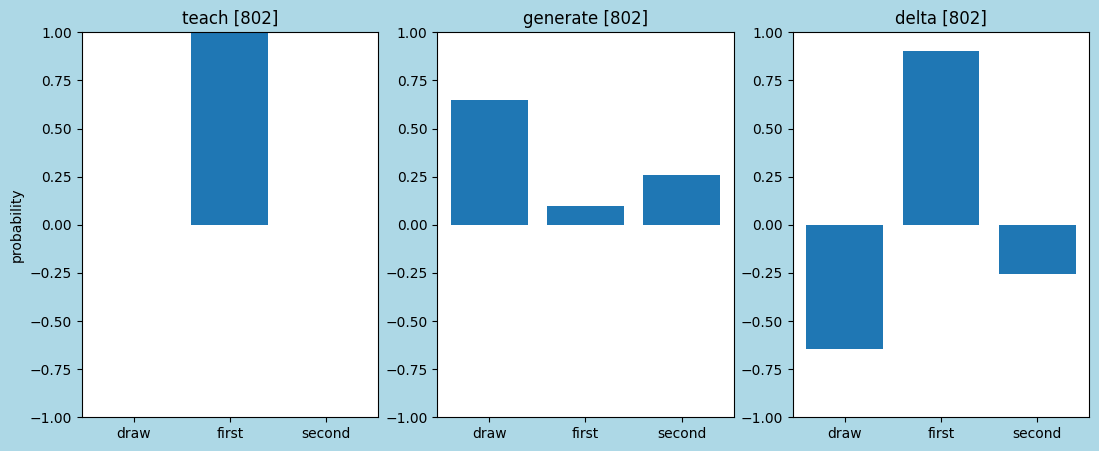

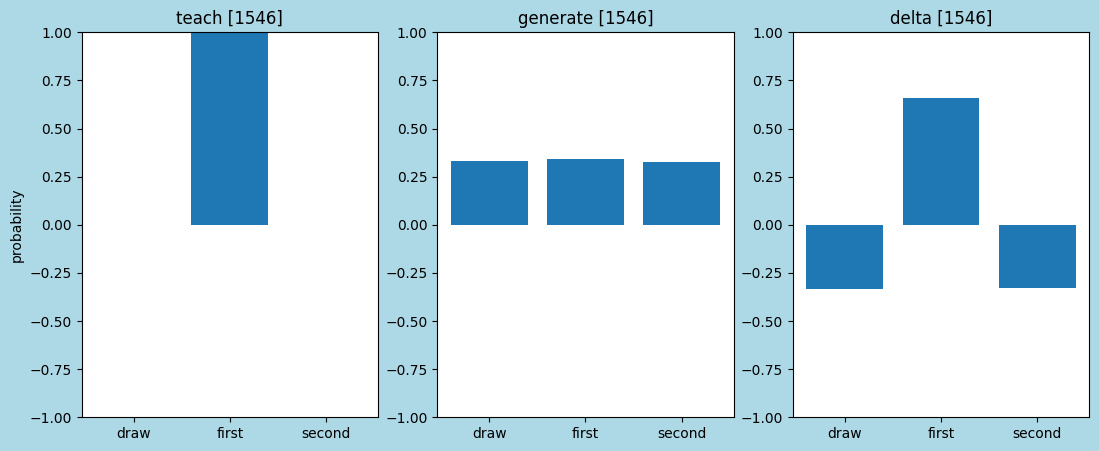

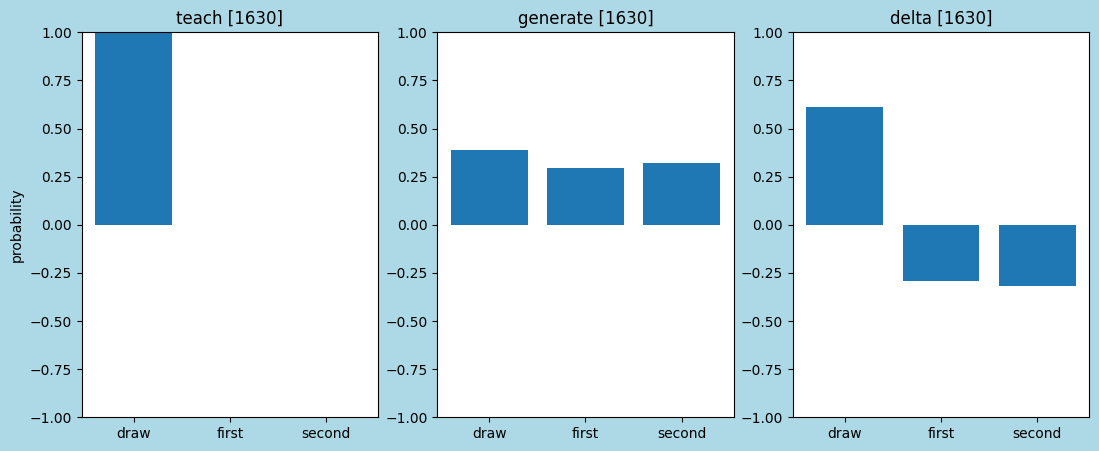

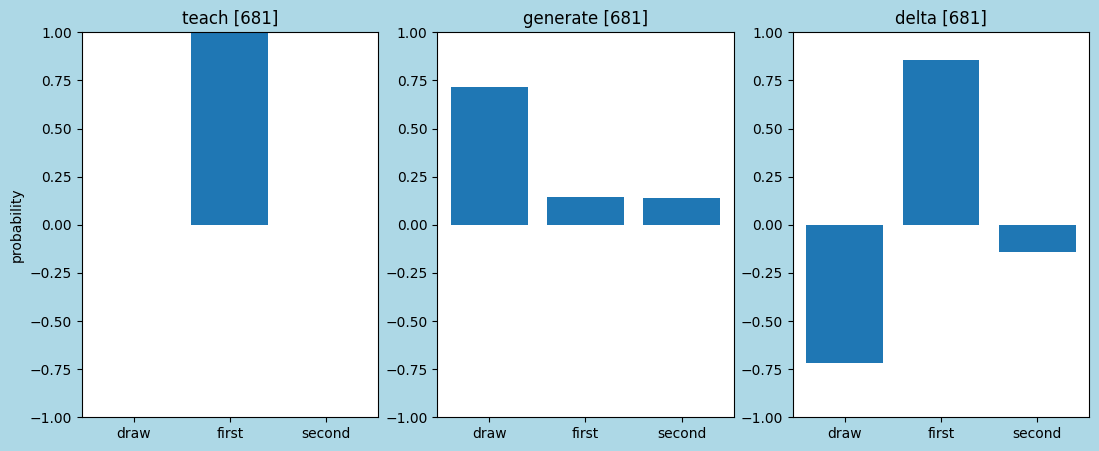

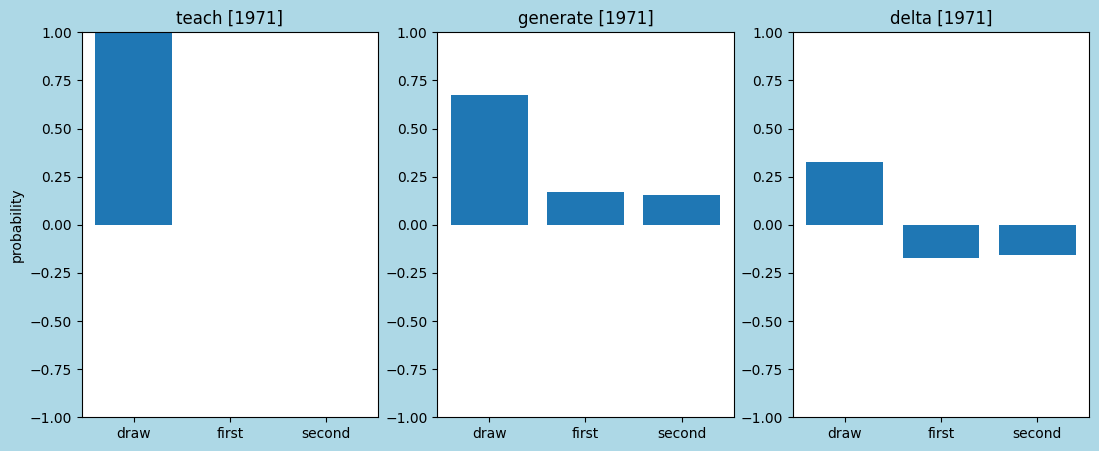

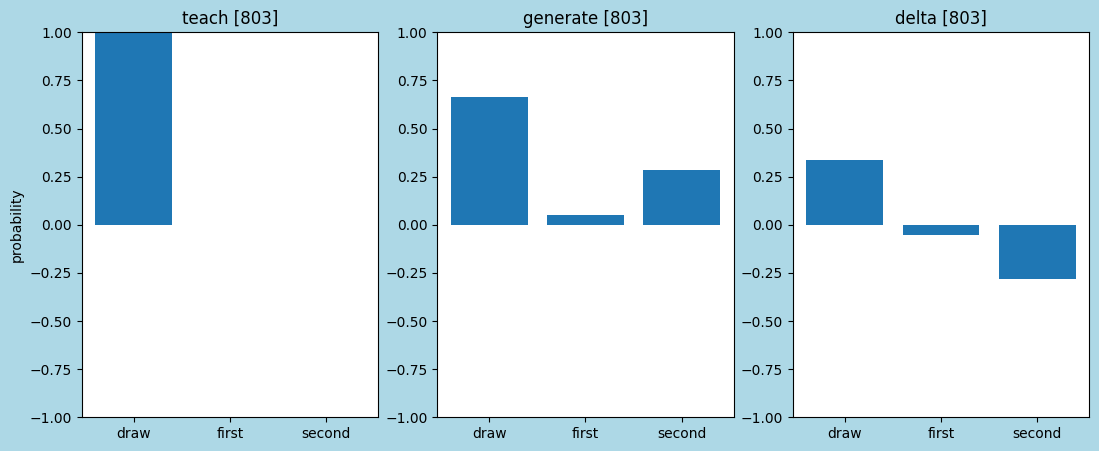

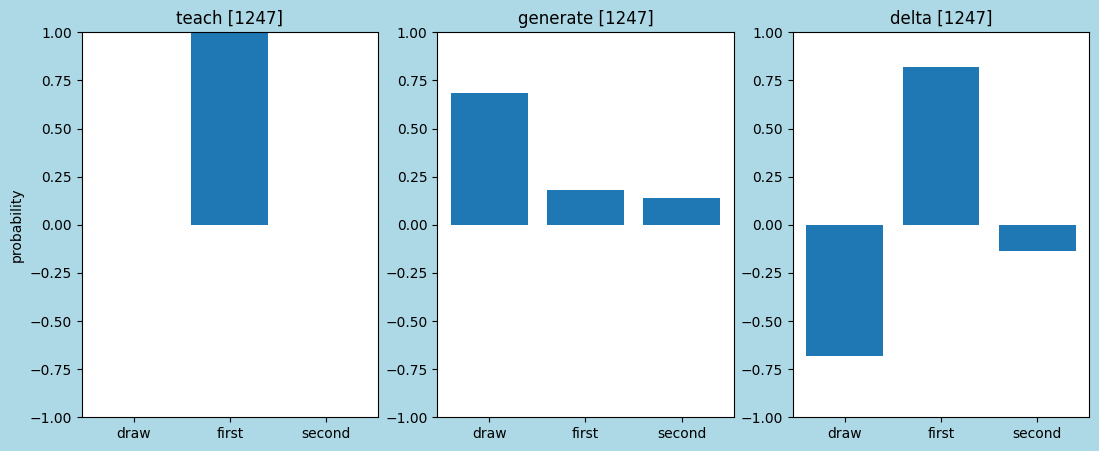

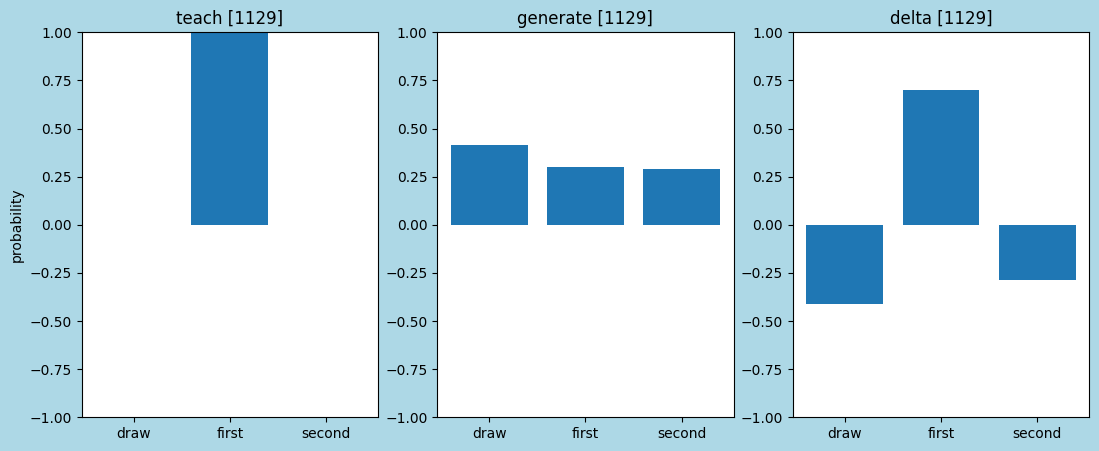

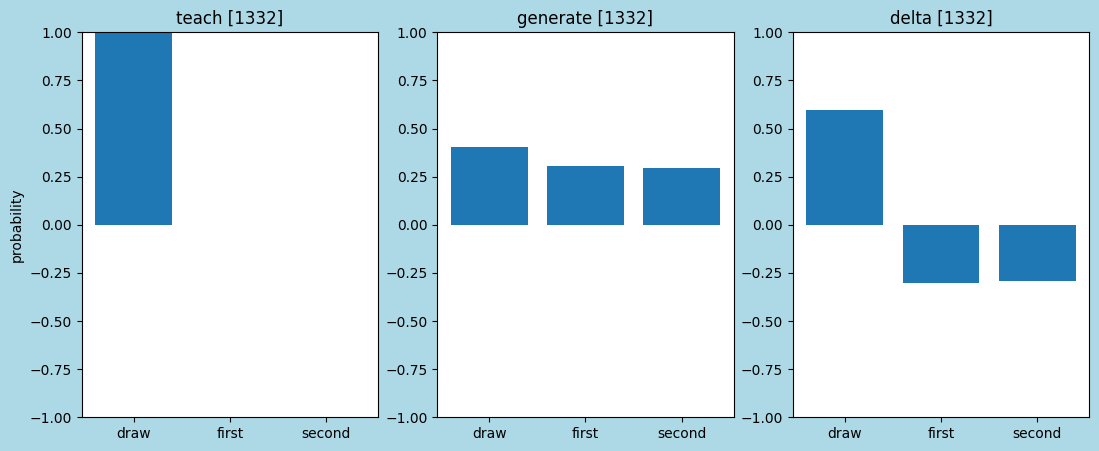

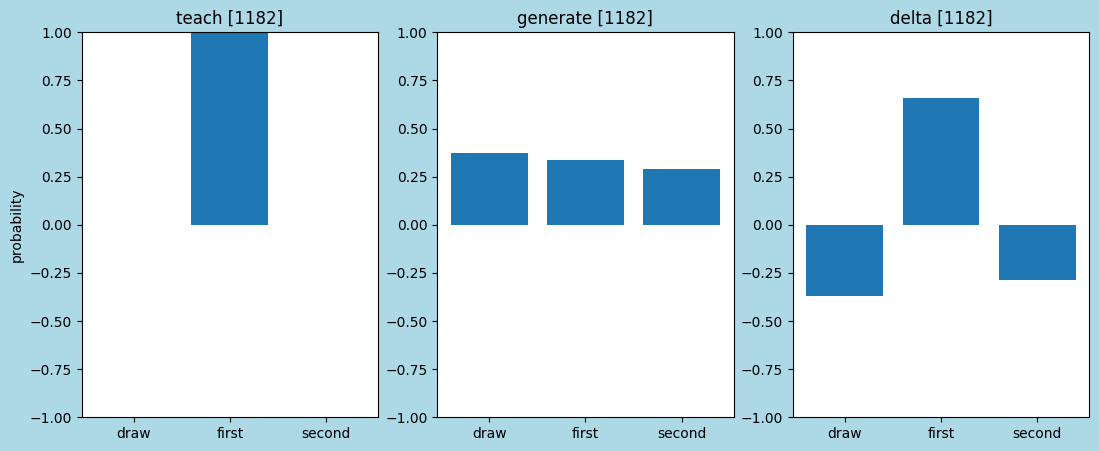

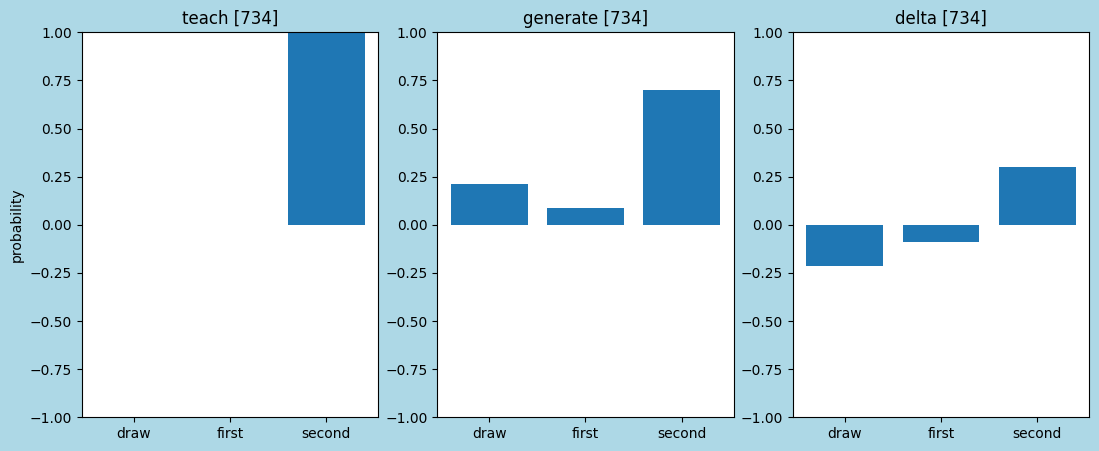

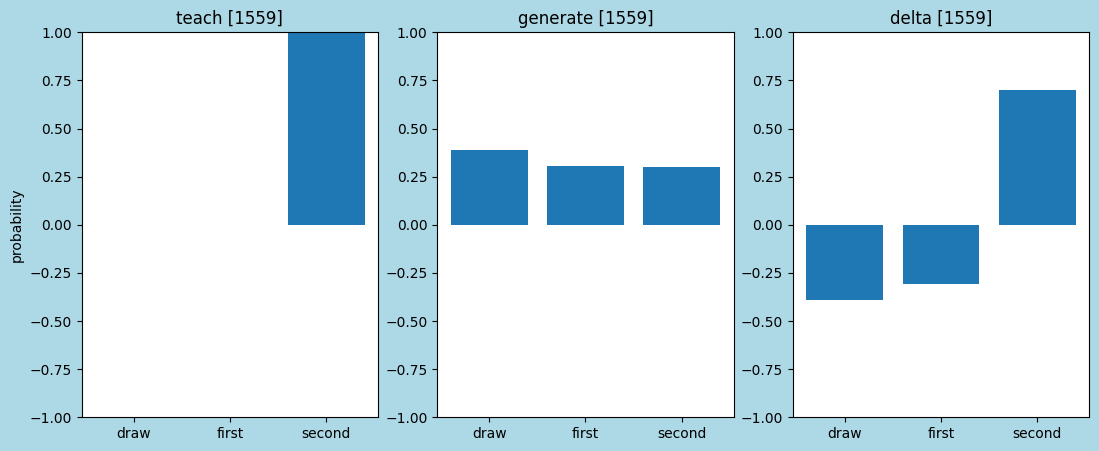

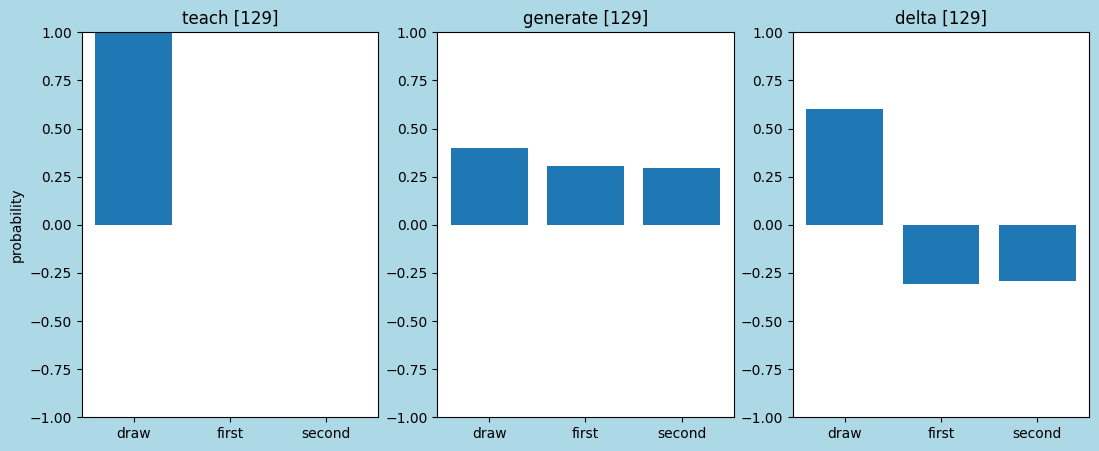

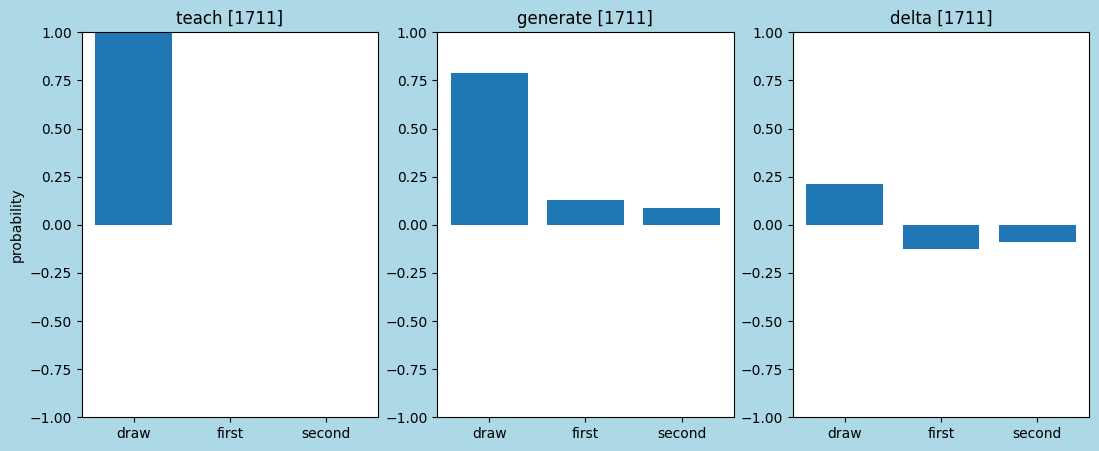

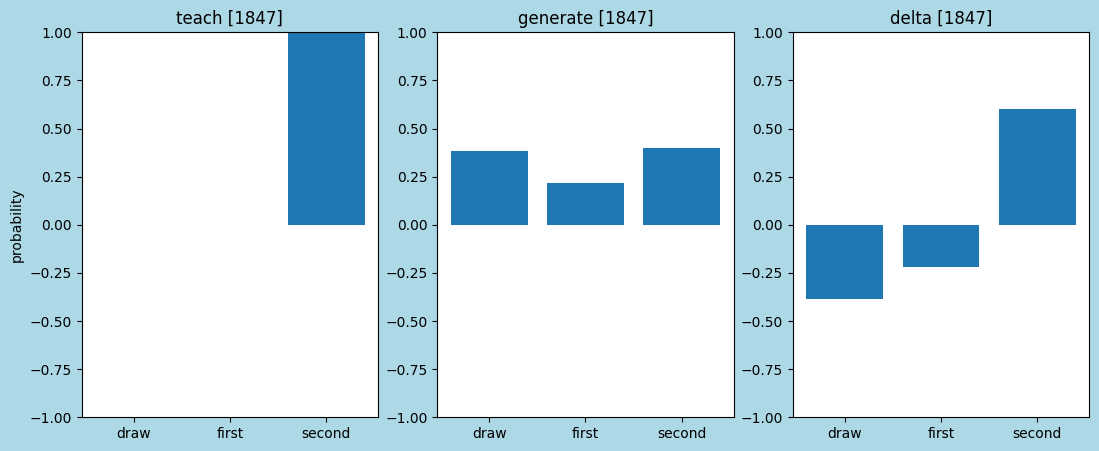

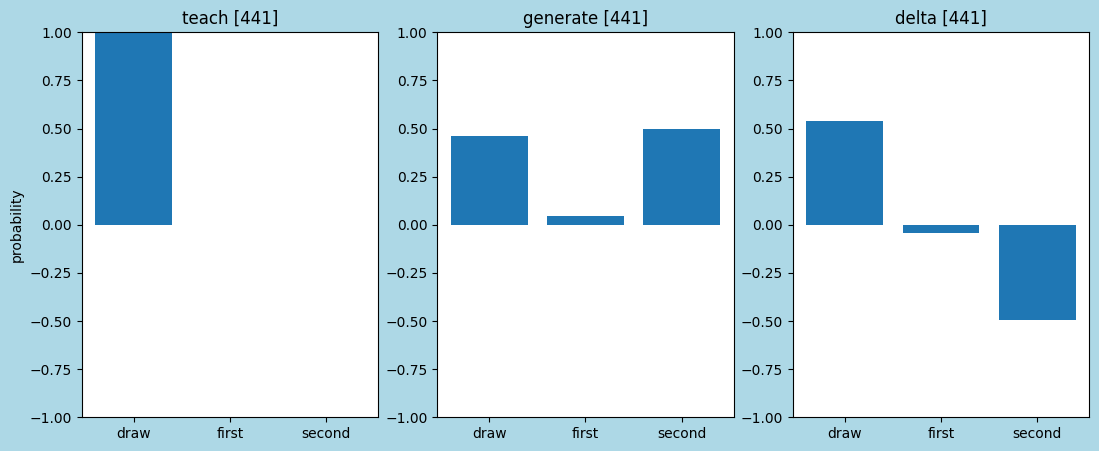

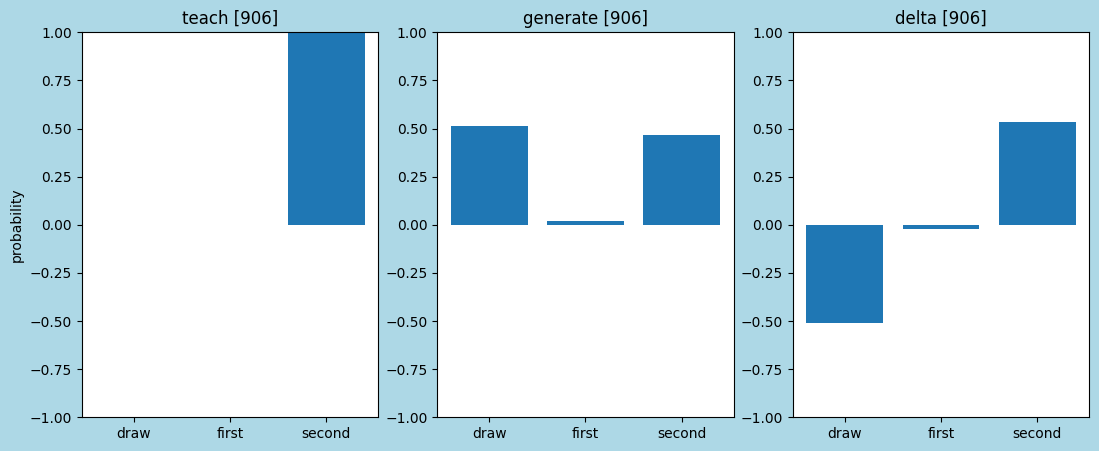

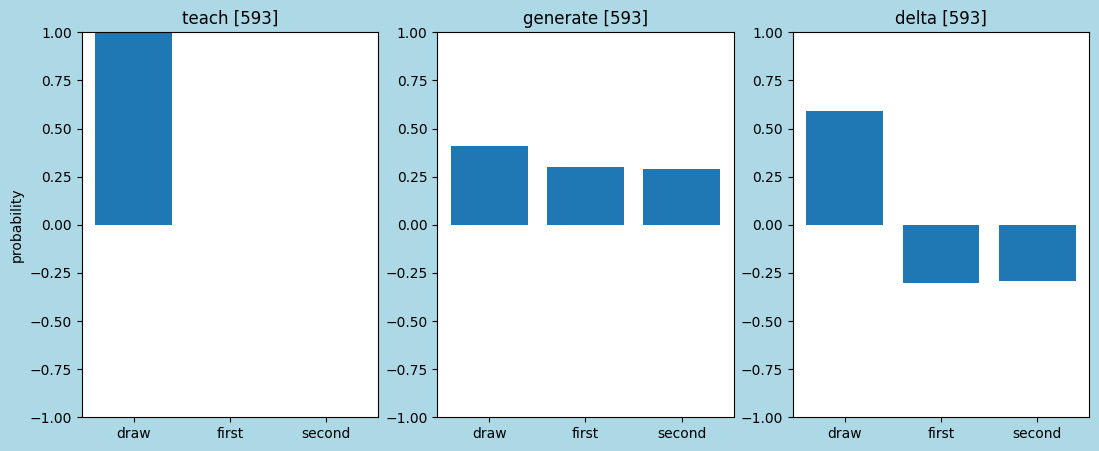

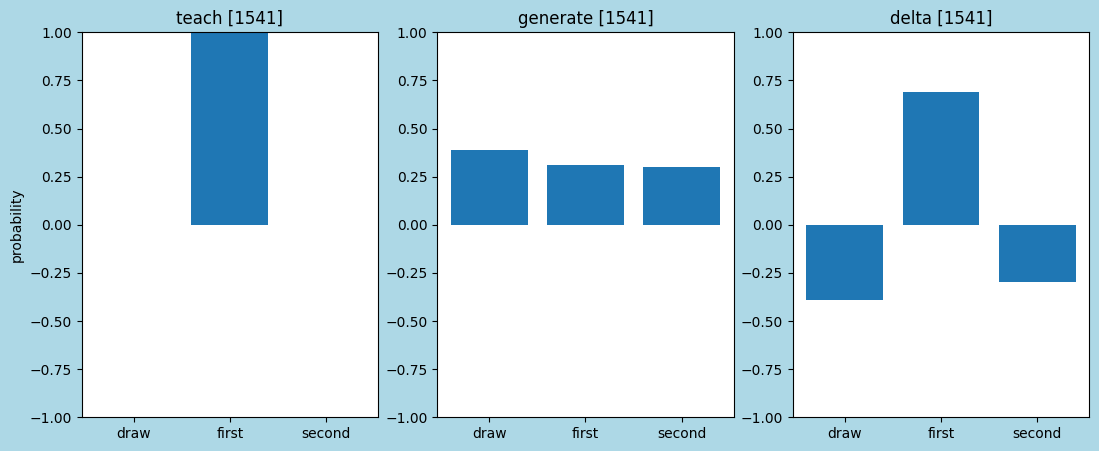

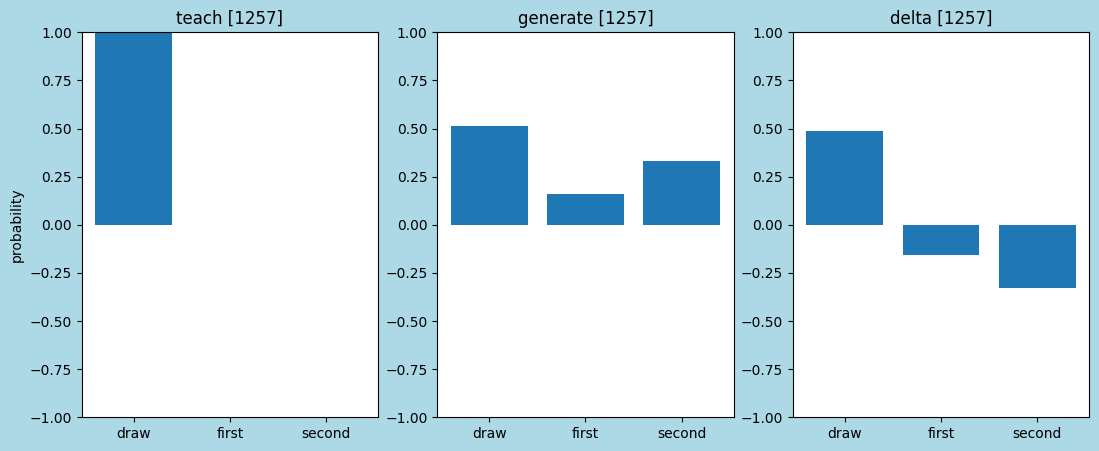

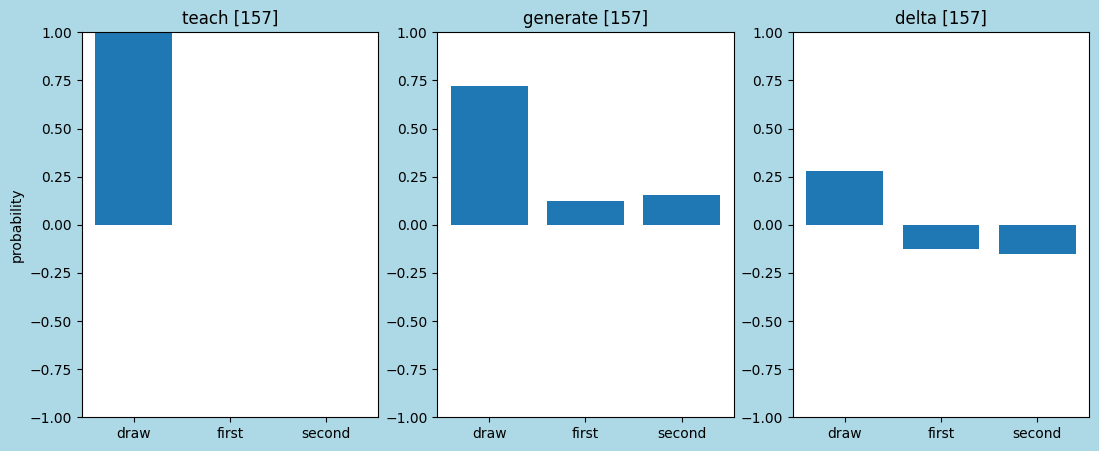

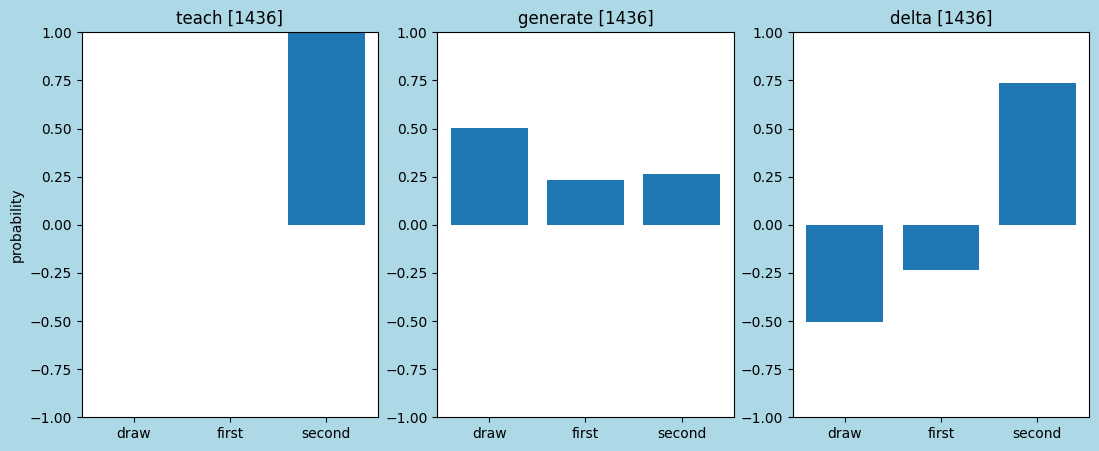

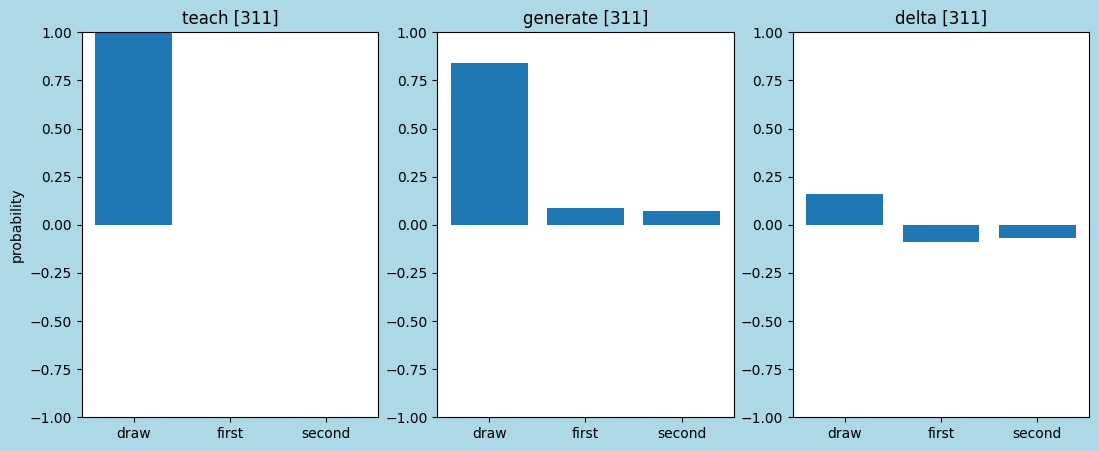

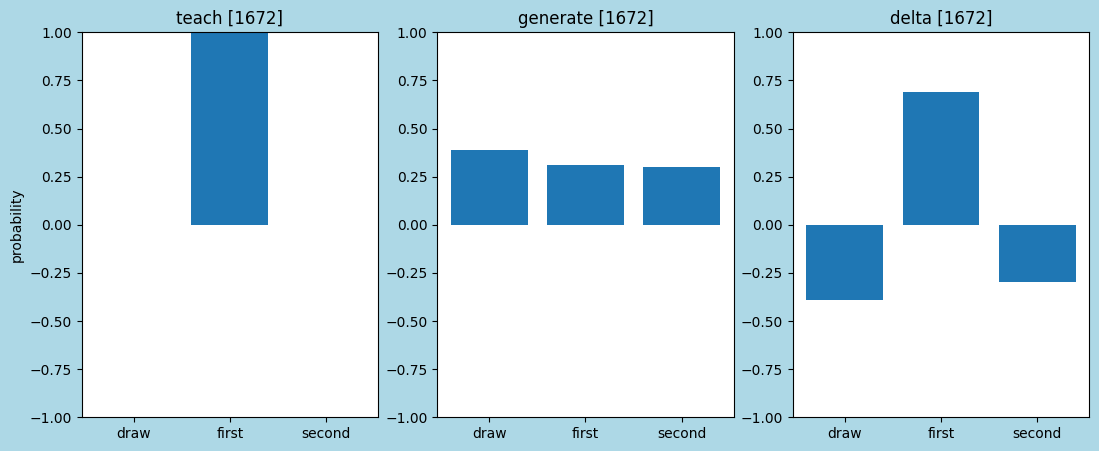

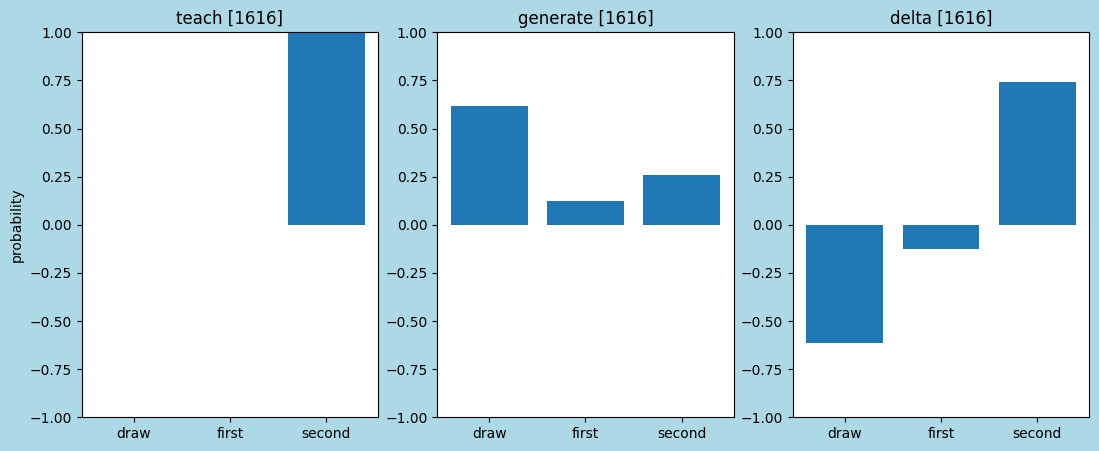

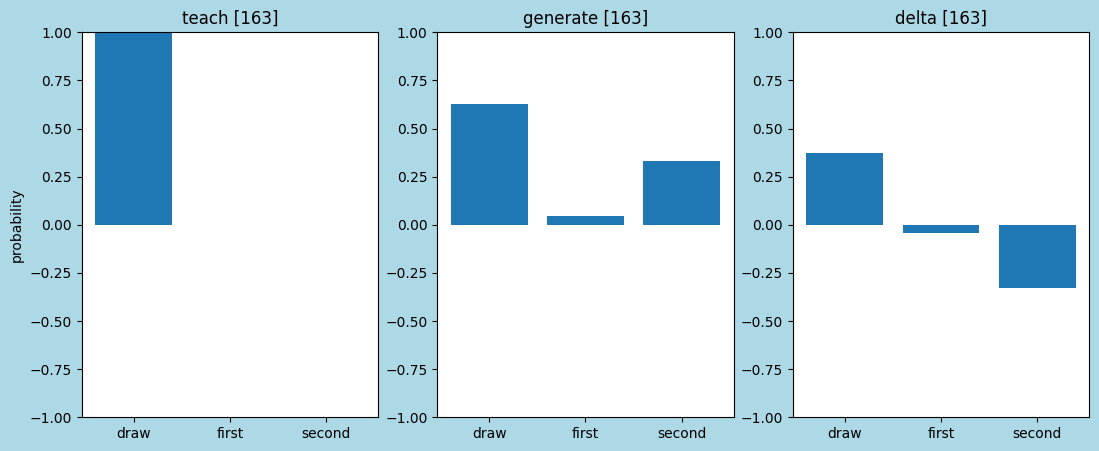

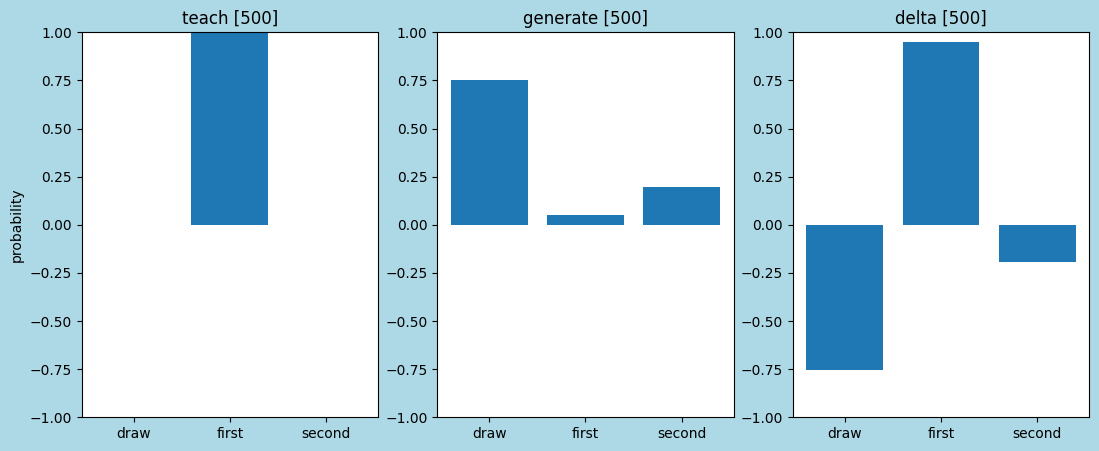

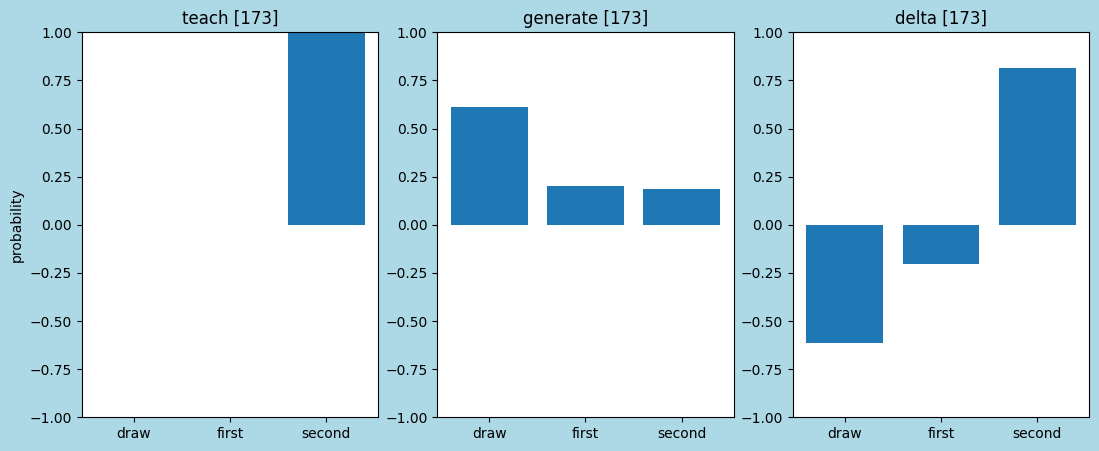

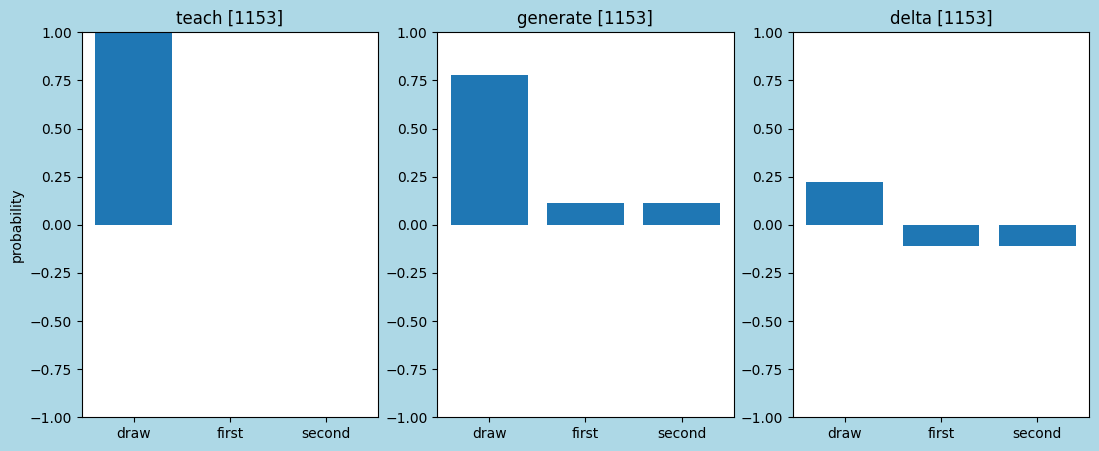

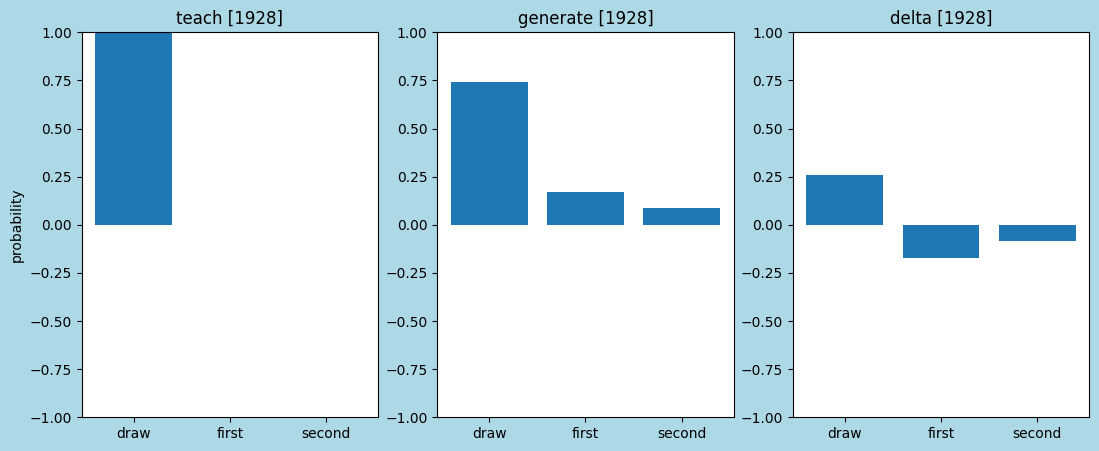

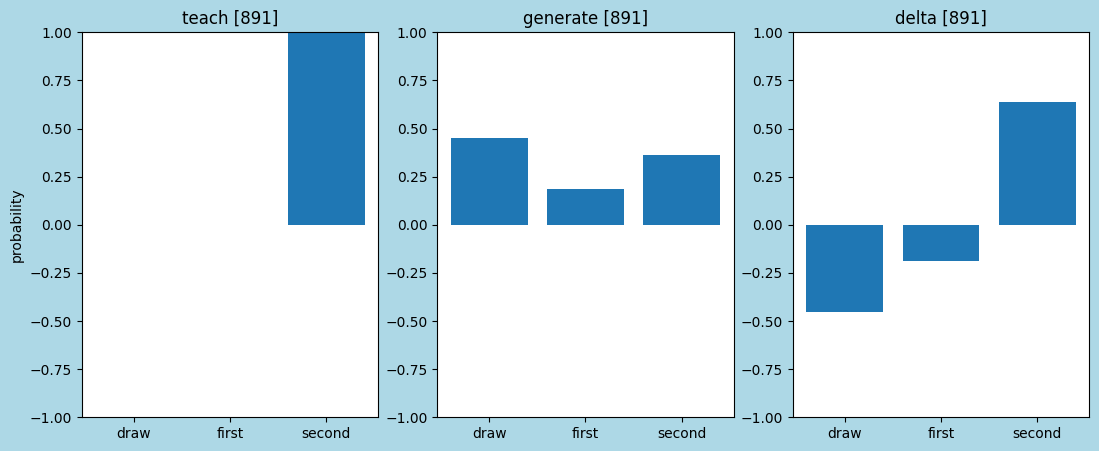

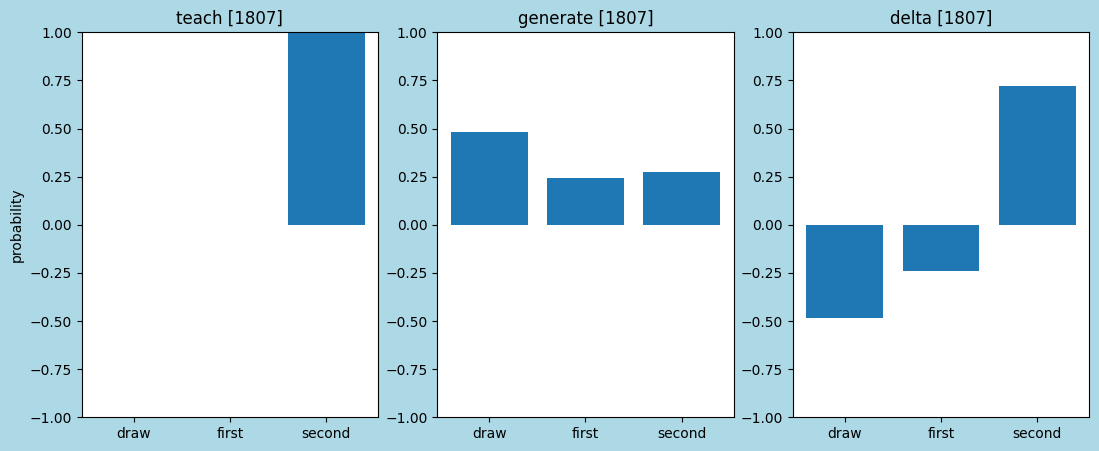

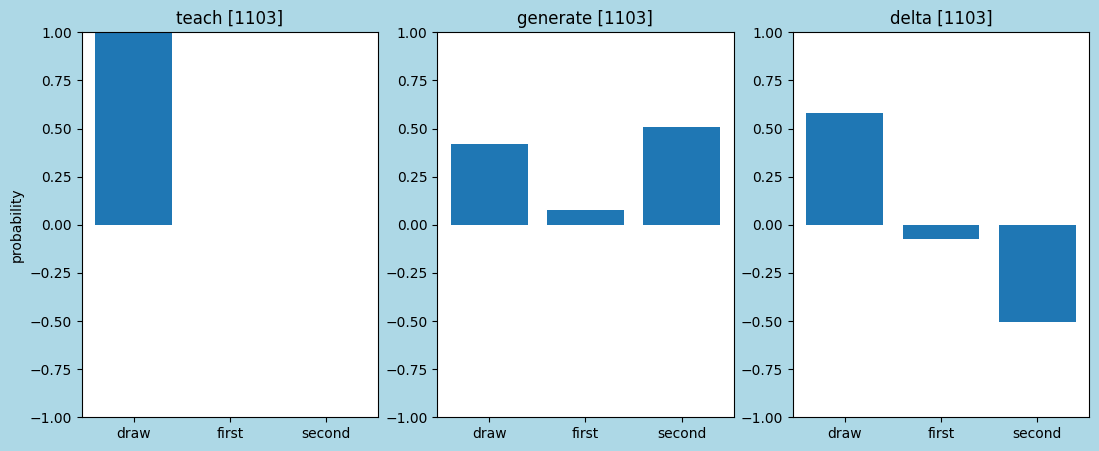

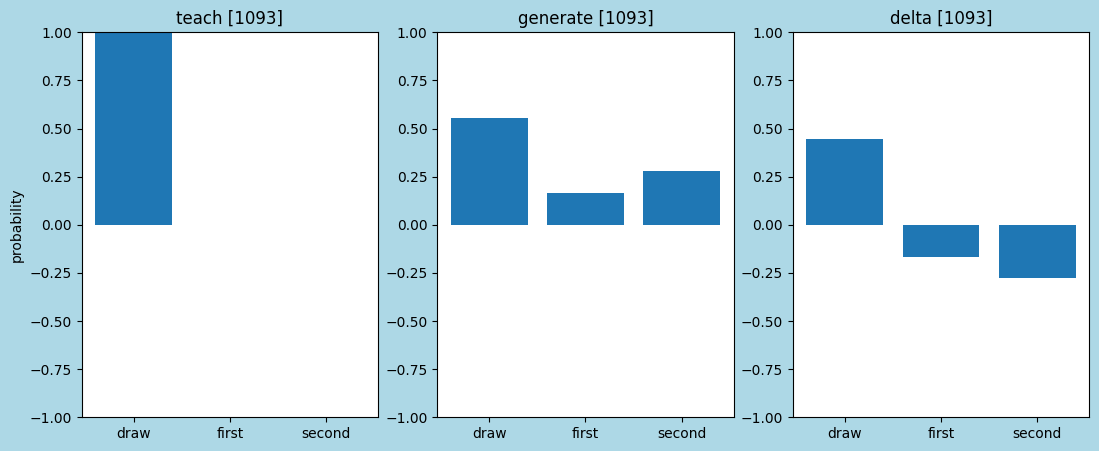

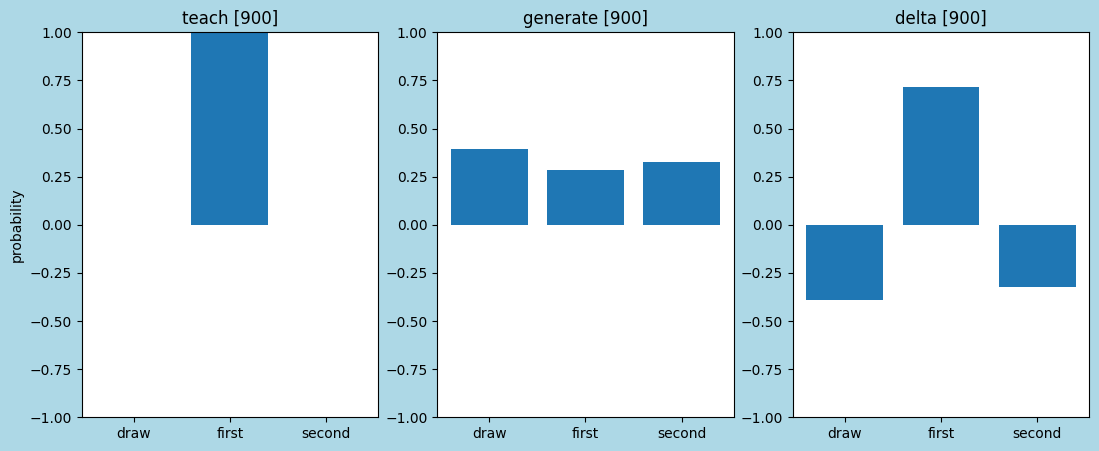

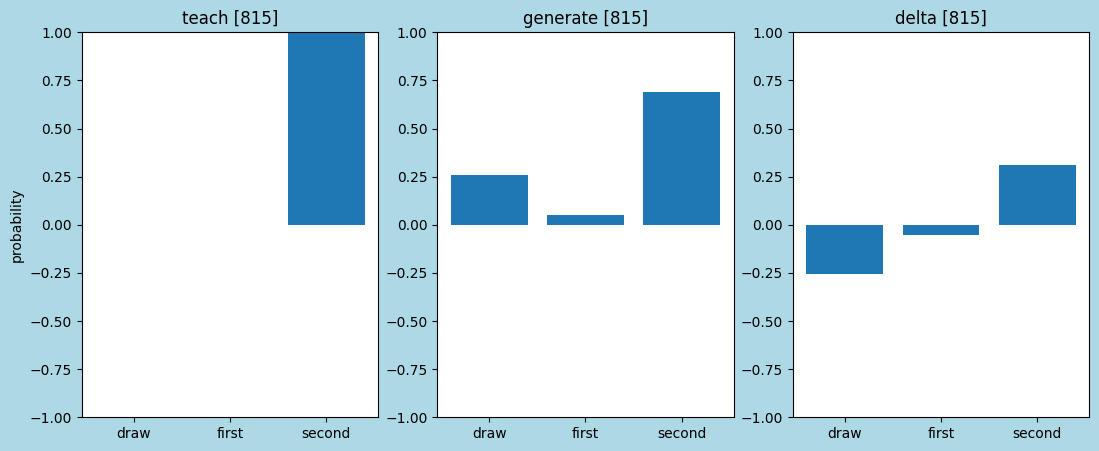

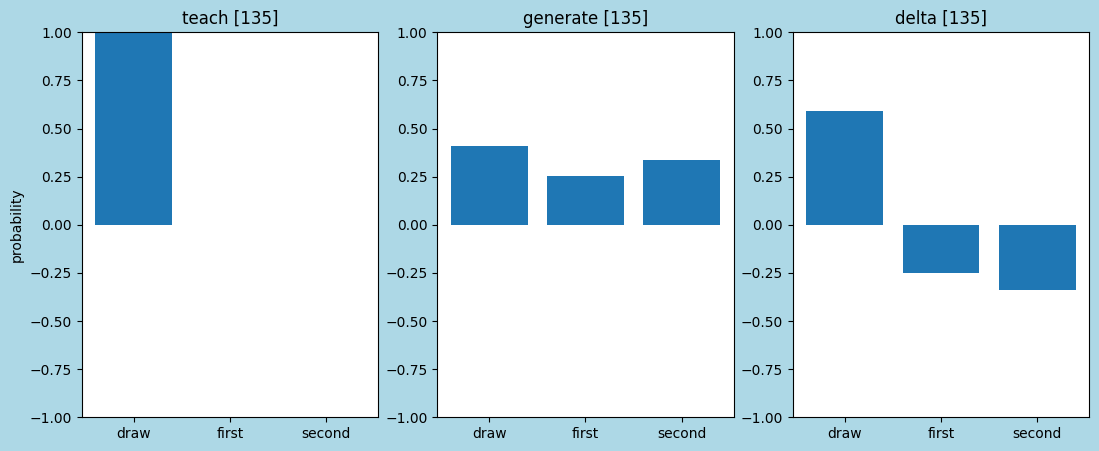

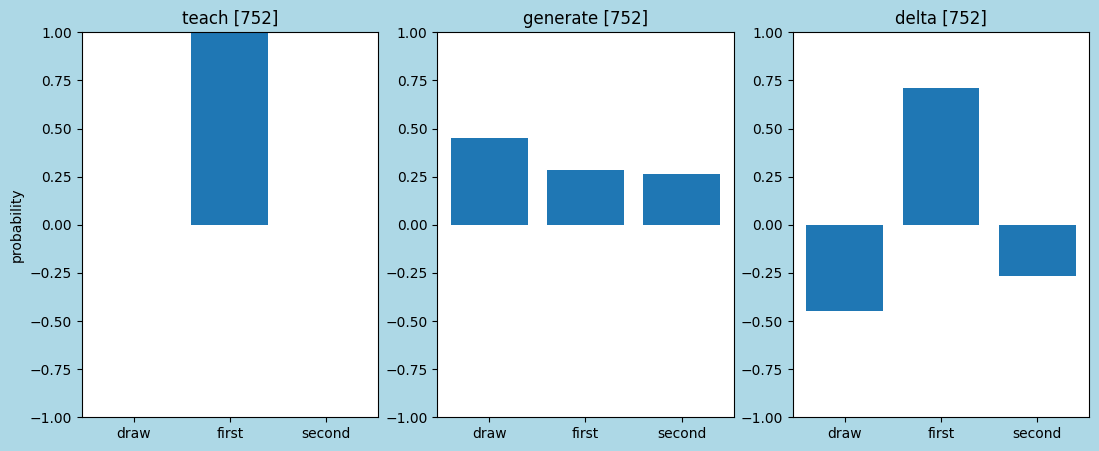

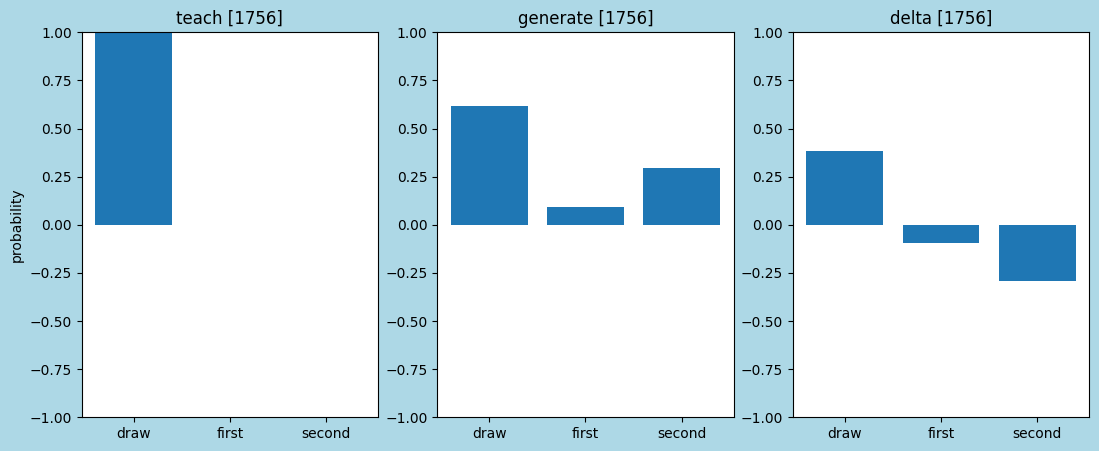

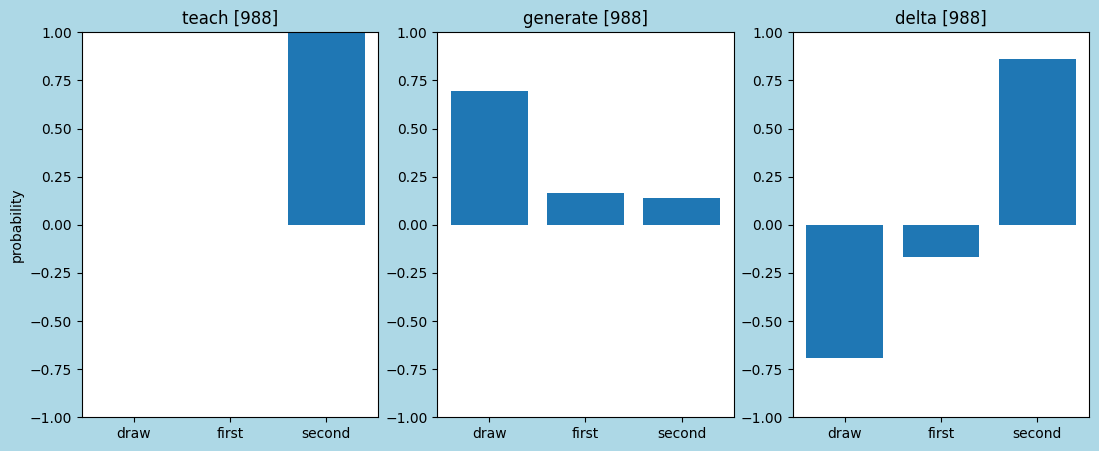

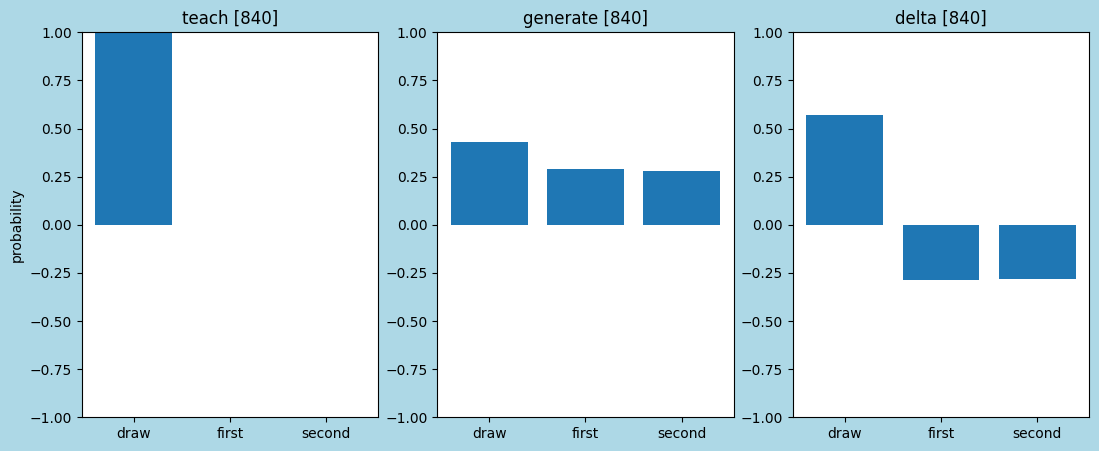

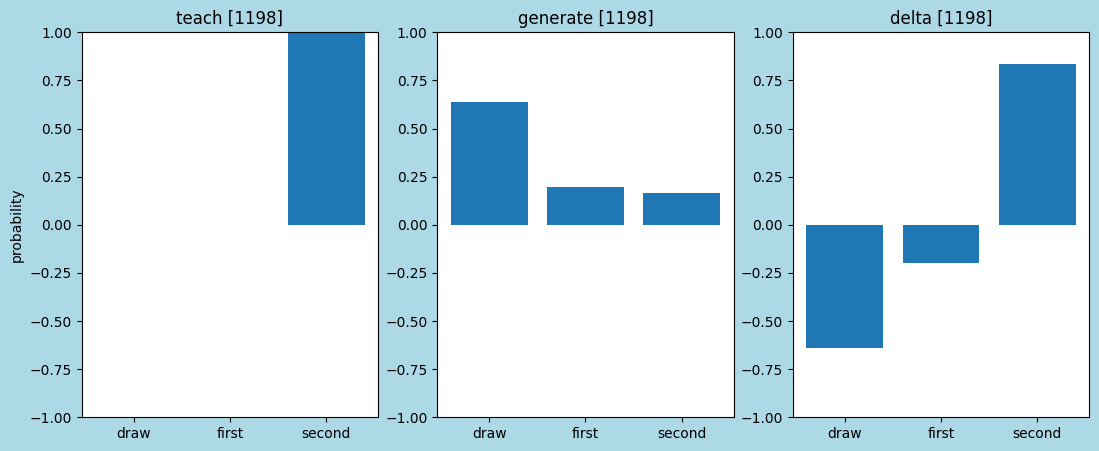

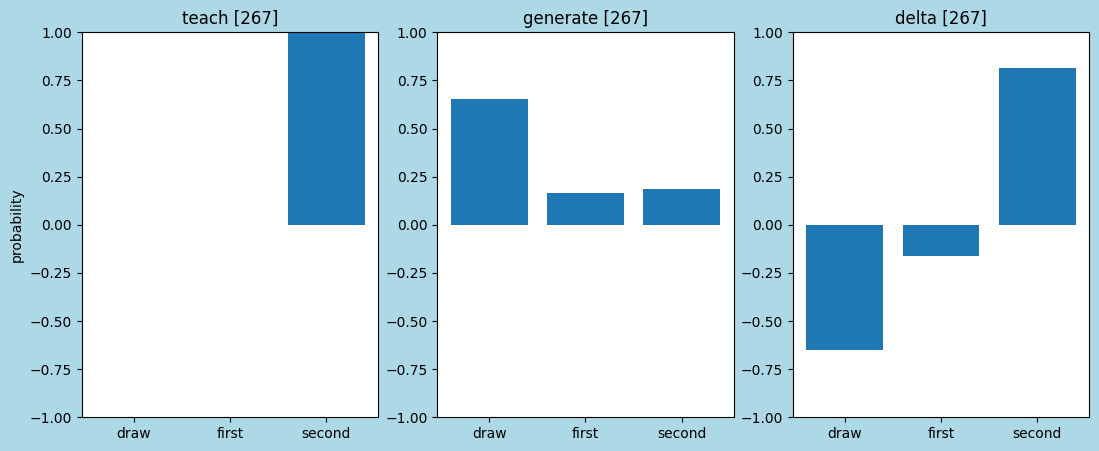

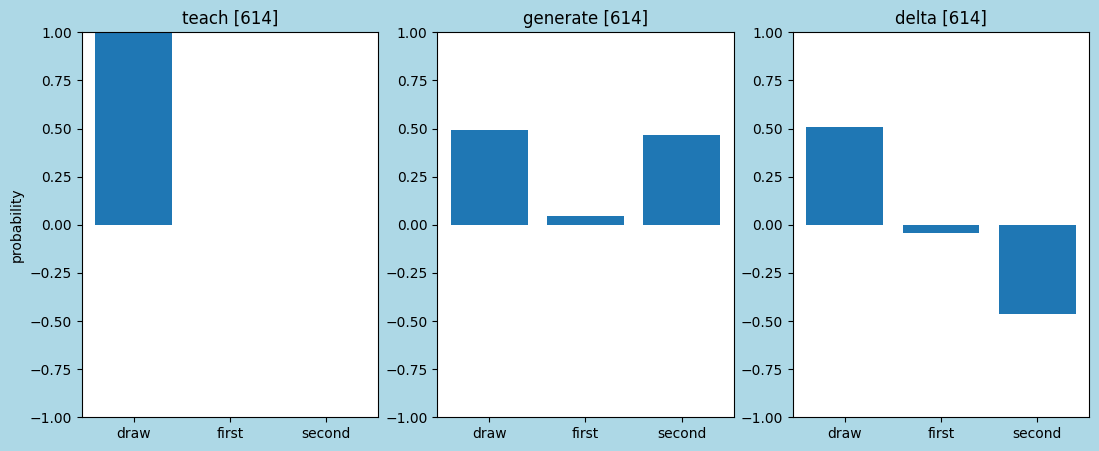

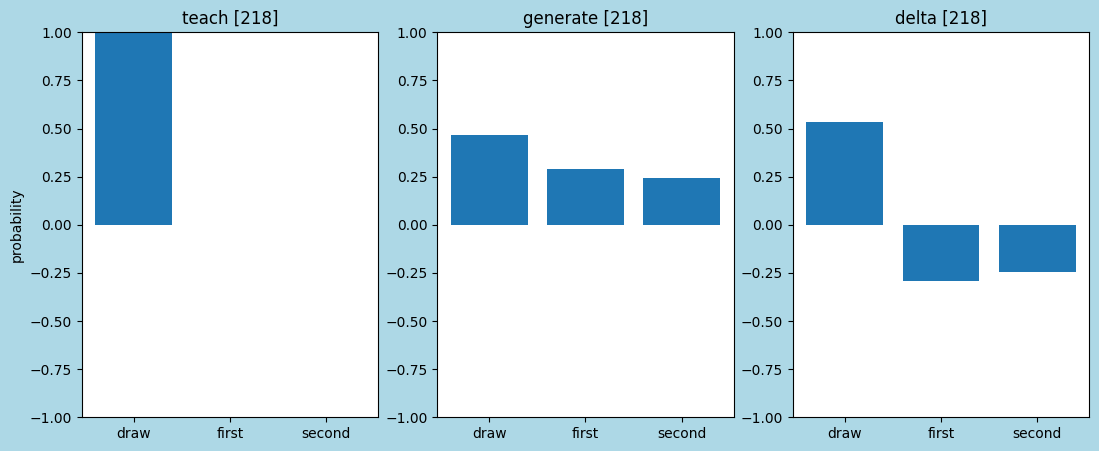

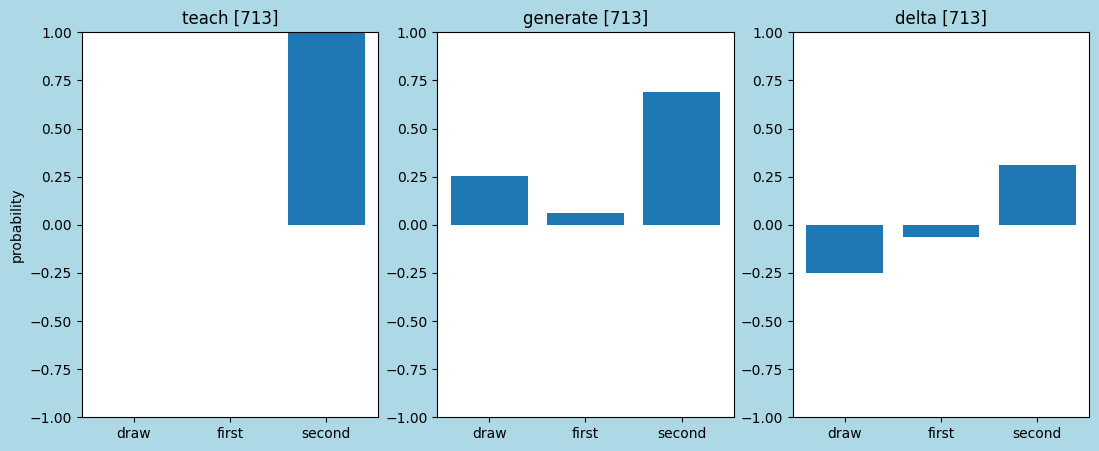

In [ ]:
import matplotlib.pyplot as plt
import random

for i in range(100):
    index = random.randint(1, 2000)

    label = ['draw', 'first', 'second']

    fig = plt.figure(figsize = (13, 5), facecolor= 'lightblue')
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    teach = output.loc[index].to_numpy().astype(float)
    generate = predictions[index]
    delta = teach - generate

    df = pd.DataFrame([teach, generate, delta], ['teach', 'generate', 'delta'], ['draw', 'first', 'second'])
    # print(df)

    ax1.set_ylabel("probability")
    ax1.set_title(f"teach [{index}]")
    ax2.set_title(f"generate [{index}]")
    ax3.set_title(f"delta [{index}]")
    ax1.set_ylim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax3.set_ylim(-1, 1)
    ax1.bar(label, teach)
    ax2.bar(label, generate)
    ax3.bar(label, delta)